# <center>Project of Machine Learning</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS*</center>

<center>
Group 17 <br>
Diogo Ruivo, 20240584  <br>
José Tiago, 20240582  <br>
Matilde Miguel, 20240549  <br>
Nuno Sousa, 20222125  <br>
Rafael Lopes, 20240588  <br>



    
</center>


** **

## Project Description     
This project addresses the task of automating decisions on compensation in insurance claims related to workplace injuries. Using historical data from the New York WCB, our objective is to predict the type of compensation a claim will be awarded, thereby optimizing the decision-making process and improving consistency in outcomes.   

This project aims to build a robust predictive model to classify injury claims in a multiclass classification scenario, explore and optimize model performance through preprocessing techniques and hyperparameter tuning and provide interpretative analysis to identify the most influential variables in the final decision.   

Prior studies show that machine learning techniques, such as random forests and XGBoost, have proven effective in automating decision-making processes in insurance. Our work builds on these approaches, exploring multiple variables related to demographics and injury types to create an interpretable and reliable decision-making model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data partition
from sklearn.model_selection import train_test_split

#empty values
import missingno as msno
from sklearn.impute import KNNImputer

#feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency, spearmanr

from sklearn.decomposition import PCA

#wrapper methods
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
 
# embedded methods
from sklearn.linear_model import LassoCV

#
from math import ceil

#scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder,  OrdinalEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

from imblearn.over_sampling import ADASYN

#model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')


from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')
%store -r Agreement_Reached
test['Agreement Reached'] = Agreement_Reached

In [3]:
cols = test.columns.tolist()
cols[-2], cols[-1] = cols[-1], cols[-2]
test = test[cols]

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>



In [4]:
train.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [5]:
train['Zip Code'].value_counts()

Zip Code
11236      3302
10940      2971
11717      2807
11434      2759
11706      2728
           ... 
09603         1
13125         1
75038.0       1
14507.0       1
07122         1
Name: count, Length: 10060, dtype: int64

In [6]:
test.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,0.0,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,0.0,1
2,2022-12-26,59,N,2023-01-02,N,0.00,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0.0,0
3,2022-12-28,55,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,0.0,6
4,2022-12-20,25,N,2023-01-02,N,0.00,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,0.0,5
5,2022-12-28,36,N,2023-01-02,N,0.00,1986.0,2023-01-02,NaN,NYC TRANSIT AUTHORITY,...,NaN,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,77.0,MENTAL STRESS,66.0,NO PHYSICAL INJURY,10941,0.0,4
6,2022-12-22,19,N,2023-01-02,N,688.20,2003.0,2022-12-30,NaN,"WAL-MART ASSOCIATES, INC.",...,NaN,56.0,LIFTING,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14131,0.0,6
7,2022-12-13,43,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,ERIE INSURANCE CO OF NY,...,NaN,27.0,FROM LIQUID OR GREASE SPILLS,49.0,SPRAIN OR TEAR,53.0,KNEE,13357,0.0,4
8,2022-12-28,40,N,2023-01-02,N,0.00,1982.0,2022-12-31,NaN,STARR INDEMNITY & LIABILITY CO,...,NaN,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),11735,0.0,3
9,2022-11-01,48,N,2023-01-02,Y,1180.74,1974.0,2023-01-02,2023-01-09,STATE INSURANCE FUND,...,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14720,0.0,0


In [7]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 33)
Test dimensions: (387975, 31)


In [8]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
Test columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [11]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,...,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,...,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,...,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,...,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,...,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,...,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,...,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,...,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,...,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [12]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,...,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,...,NaN,NaN,74,NaN,56,NaN,51,6276,NaN,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,...,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,...,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,...,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,0.004472,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,...,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,0.066723,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,...,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,0.000000,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,...,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,0.000000,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,...,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,0.000000,5.000000


<hr>
<a class="anchor" id="furtheranalysis">
    
## 3.1 Further Analysis
    
</a>

In [13]:
print('youngest person:',train['Birth Year'].max())
print('oldest injured:',train['Age at Injury'].max())
print('most dependents:',train['Number of Dependents'].max())

youngest person: 2018.0
oldest injured: 117.0
most dependents: 6.0


In [14]:
for i in train.columns:
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())
    print('\n')

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

<hr>
<a class="anchor" id="graphicalrepresentaion">
    
### 3.1.1 Graphical Representaion
    
</a>

In [15]:
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=[object]).columns.tolist()

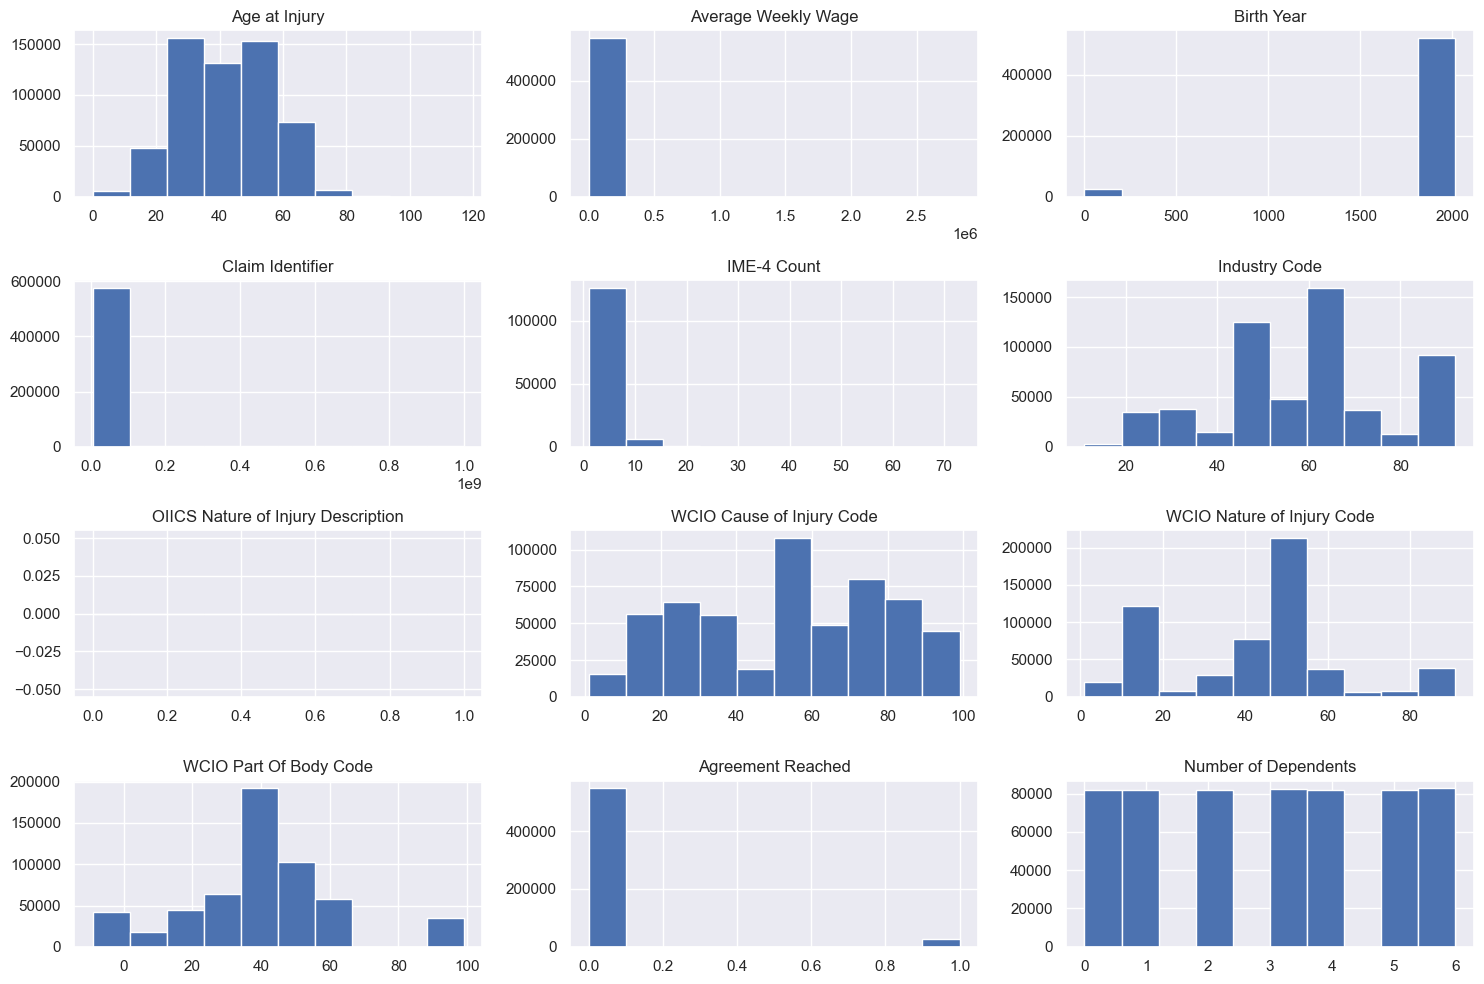

In [16]:
train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

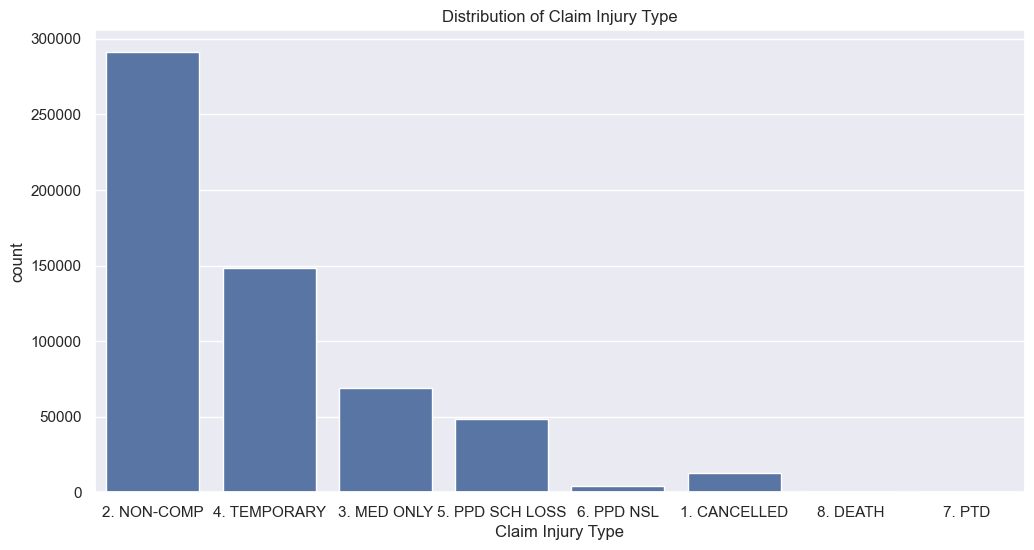

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot( x= 'Claim Injury Type', data = train)
plt.title('Distribution of Claim Injury Type')
plt.show()

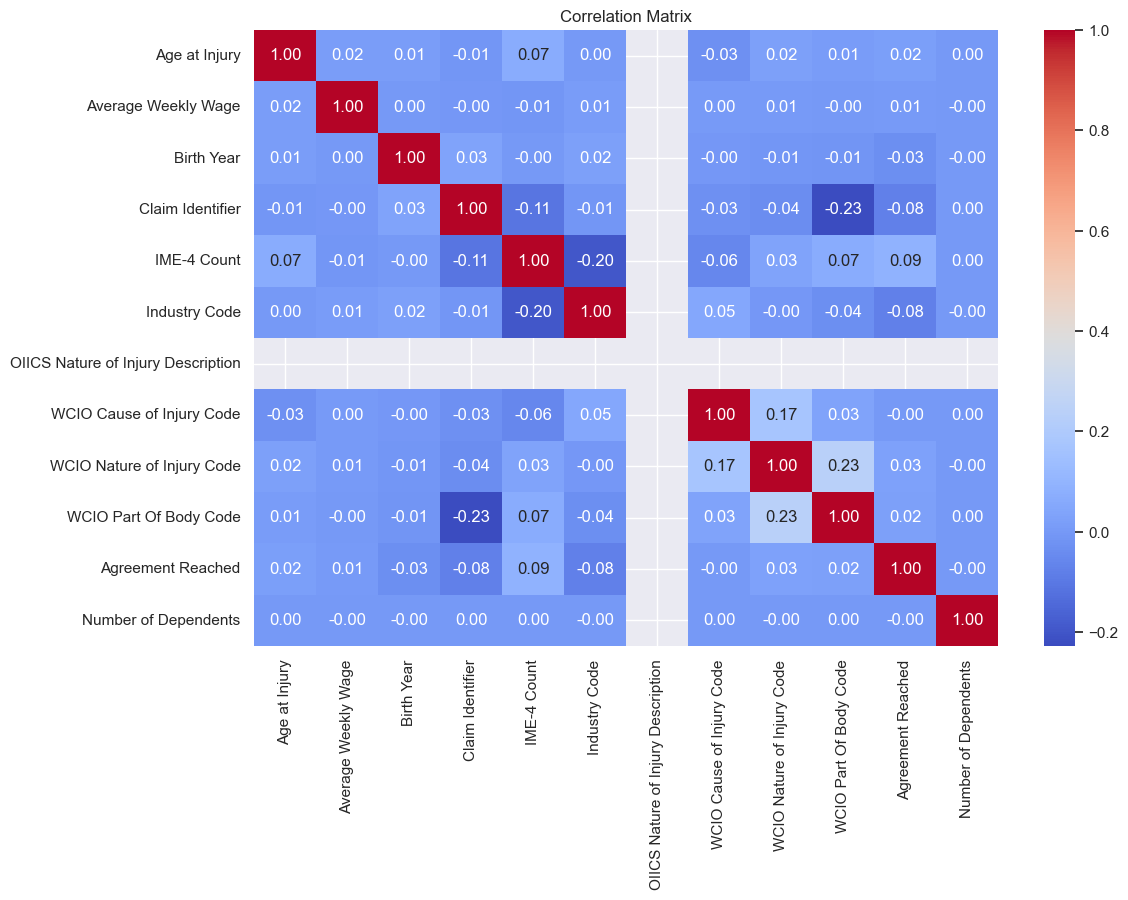

In [18]:
corr_matrix = train[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pre-Processing

In [19]:
# set Claim Identifier as index
train.set_index('Claim Identifier', inplace=True) 
test.set_index('Claim Identifier', inplace=True)

### Dropping Columns

In [20]:
# Delete the column with all missing values
train.drop(['WCB Decision'], inplace = True, axis = 1)
train.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)
test.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)

### Pre-Processing Functions

In [21]:
# median
# for metric columns
# fill with training median as it does not get influenced by extreme outliers
def NaN_median (train, test, cols):

    for col in cols:
        if pd.api.types.is_numeric_dtype(train[col]): # Numeric
            median_to_fill = train[col].median()
            train[col].fillna(median_to_fill, inplace=True)
            test[col].fillna(median_to_fill, inplace=True)
            # print(df[col].isna().sum())
            
        elif pd.api.types.is_datetime64_any_dtype(train[col]):  # Date  
            median_date_to_fill = train[col].median() 
            train[col].fillna(median_date_to_fill, inplace=True)
            test[col].fillna(median_date_to_fill, inplace=True) 
            # print(df[col].isna().sum())
            
    return train, test

In [22]:
#for non-metric columns
#replace NaN with Unknown
def NaN_Unknown(df, cols):

    for col in cols:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
            # print(df[col].isna().sum())
       
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)
            # print(df[col].isna().sum())
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(pd.to_datetime('1900-01-01'))
            # print(df[col].isna().sum())
            
    return df

In [23]:
def convert_to_datetime(df, date_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
train = convert_to_datetime(train, date_cols)
test = convert_to_datetime(test, date_cols)

In [24]:
def convert_to_int(df, int_cols):

    for col in int_cols:
        df[col] = df[col].astype('Int64')
    return df

int_cols = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
convert_to_int(train, int_cols)
convert_to_int(test, int_cols)

#we will store this as int for KNN imputer and later store as objects
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
convert_to_int(train, float_to_object)
convert_to_int(test, float_to_object)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,...,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,0.0,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003,2023-01-02,NaT,A I U INSURANCE COMPANY,...,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,0.0,1
6165907,2022-12-26,59,N,2023-01-02,N,0.0,1963,2022-12-31,NaT,AMGUARD INSURANCE COMPANY,...,III,68,STATIONARY OBJECT,49,SPRAIN OR TEAR,62,BUTTOCKS,10604,0.0,0
6166047,2022-12-28,55,N,2023-01-02,N,0.0,0,2023-01-02,NaT,INDEMNITY INS. OF N AMERICA,...,IV,25,FROM DIFFERENT LEVEL (ELEVATION),10,CONTUSION,53,KNEE,11411,0.0,6
6166102,2022-12-20,25,N,2023-01-02,N,0.0,1997,2022-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,...,IV,79,OBJECT BEING LIFTED OR HANDLED,40,LACERATION,37,THUMB,11212,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,2012-09-12,52,N,2024-06-05,N,NaN,1960,2012-10-23,NaT,STATE INSURANCE FUND,...,I,<NA>,NaN,<NA>,NaN,<NA>,NaN,13619,0.0,5
6553119,2024-05-22,59,N,2024-06-05,Y,0.0,1965,NaT,2024-05-28,NYC TRANSIT AUTHORITY,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11776,0.0,1
6553542,2024-05-06,45,N,2024-06-05,Y,0.0,1979,NaT,NaT,STATE INSURANCE FUND,...,IV,<NA>,NaN,<NA>,NaN,<NA>,NaN,11368,0.0,5


<hr>
<a class="anchor" id="missingvalues">
    
## 4.3 Missing Values
    
</a>

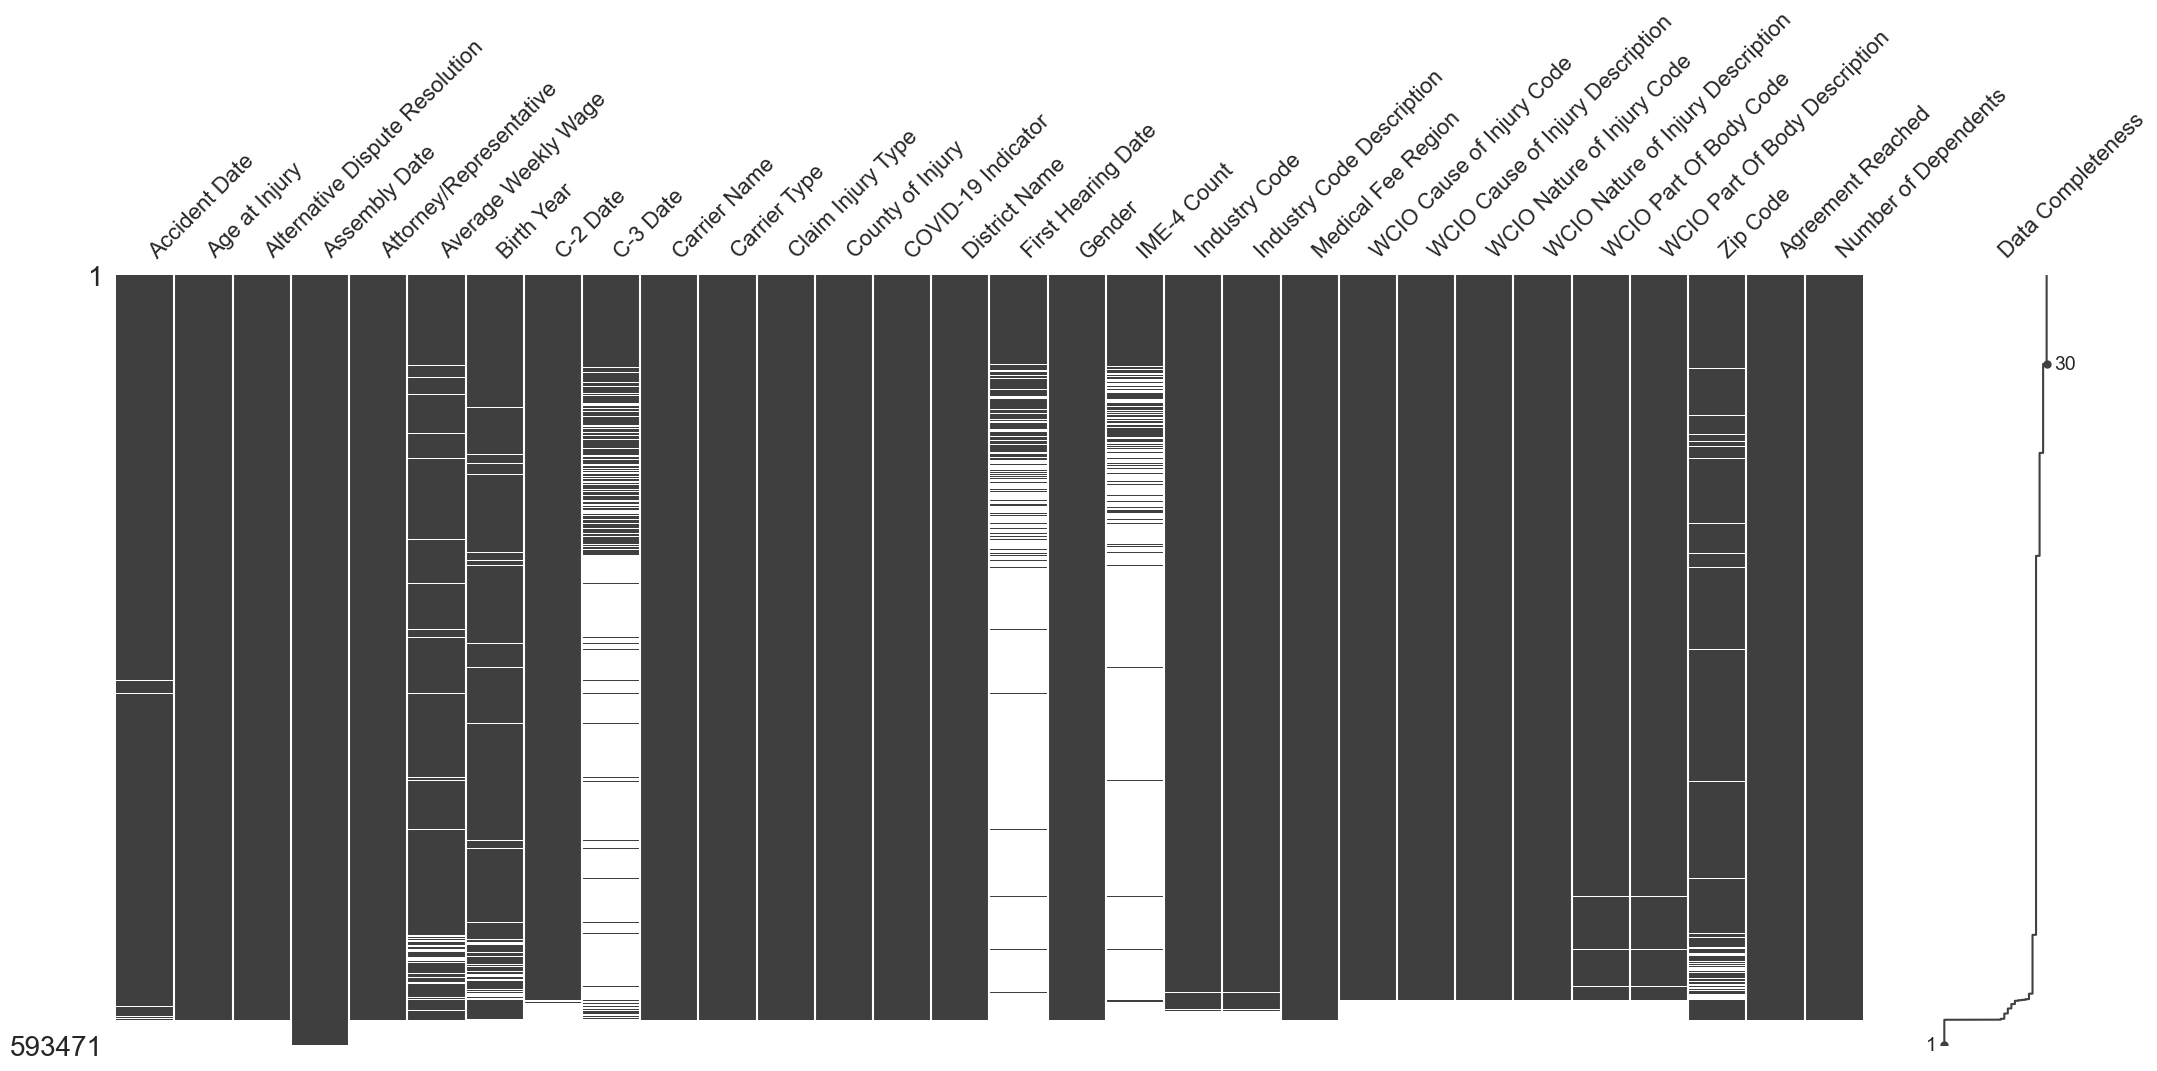

In [25]:
msno.matrix(train, labels=True, sort="descending");

In [26]:
train.isna().sum()

Accident Date                         23134
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   48096
Birth Year                            48523
C-2 Date                              34005
C-3 Date                             406226
Carrier Name                          19445
Carrier Type                          19445
Claim Injury Type                     19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   442673
Gender                                19445
IME-4 Count                          460668
Industry Code                         29403
Industry Code Description             29403
Medical Fee Region                    19445
WCIO Cause of Injury Code             35085
WCIO Cause of Injury Description

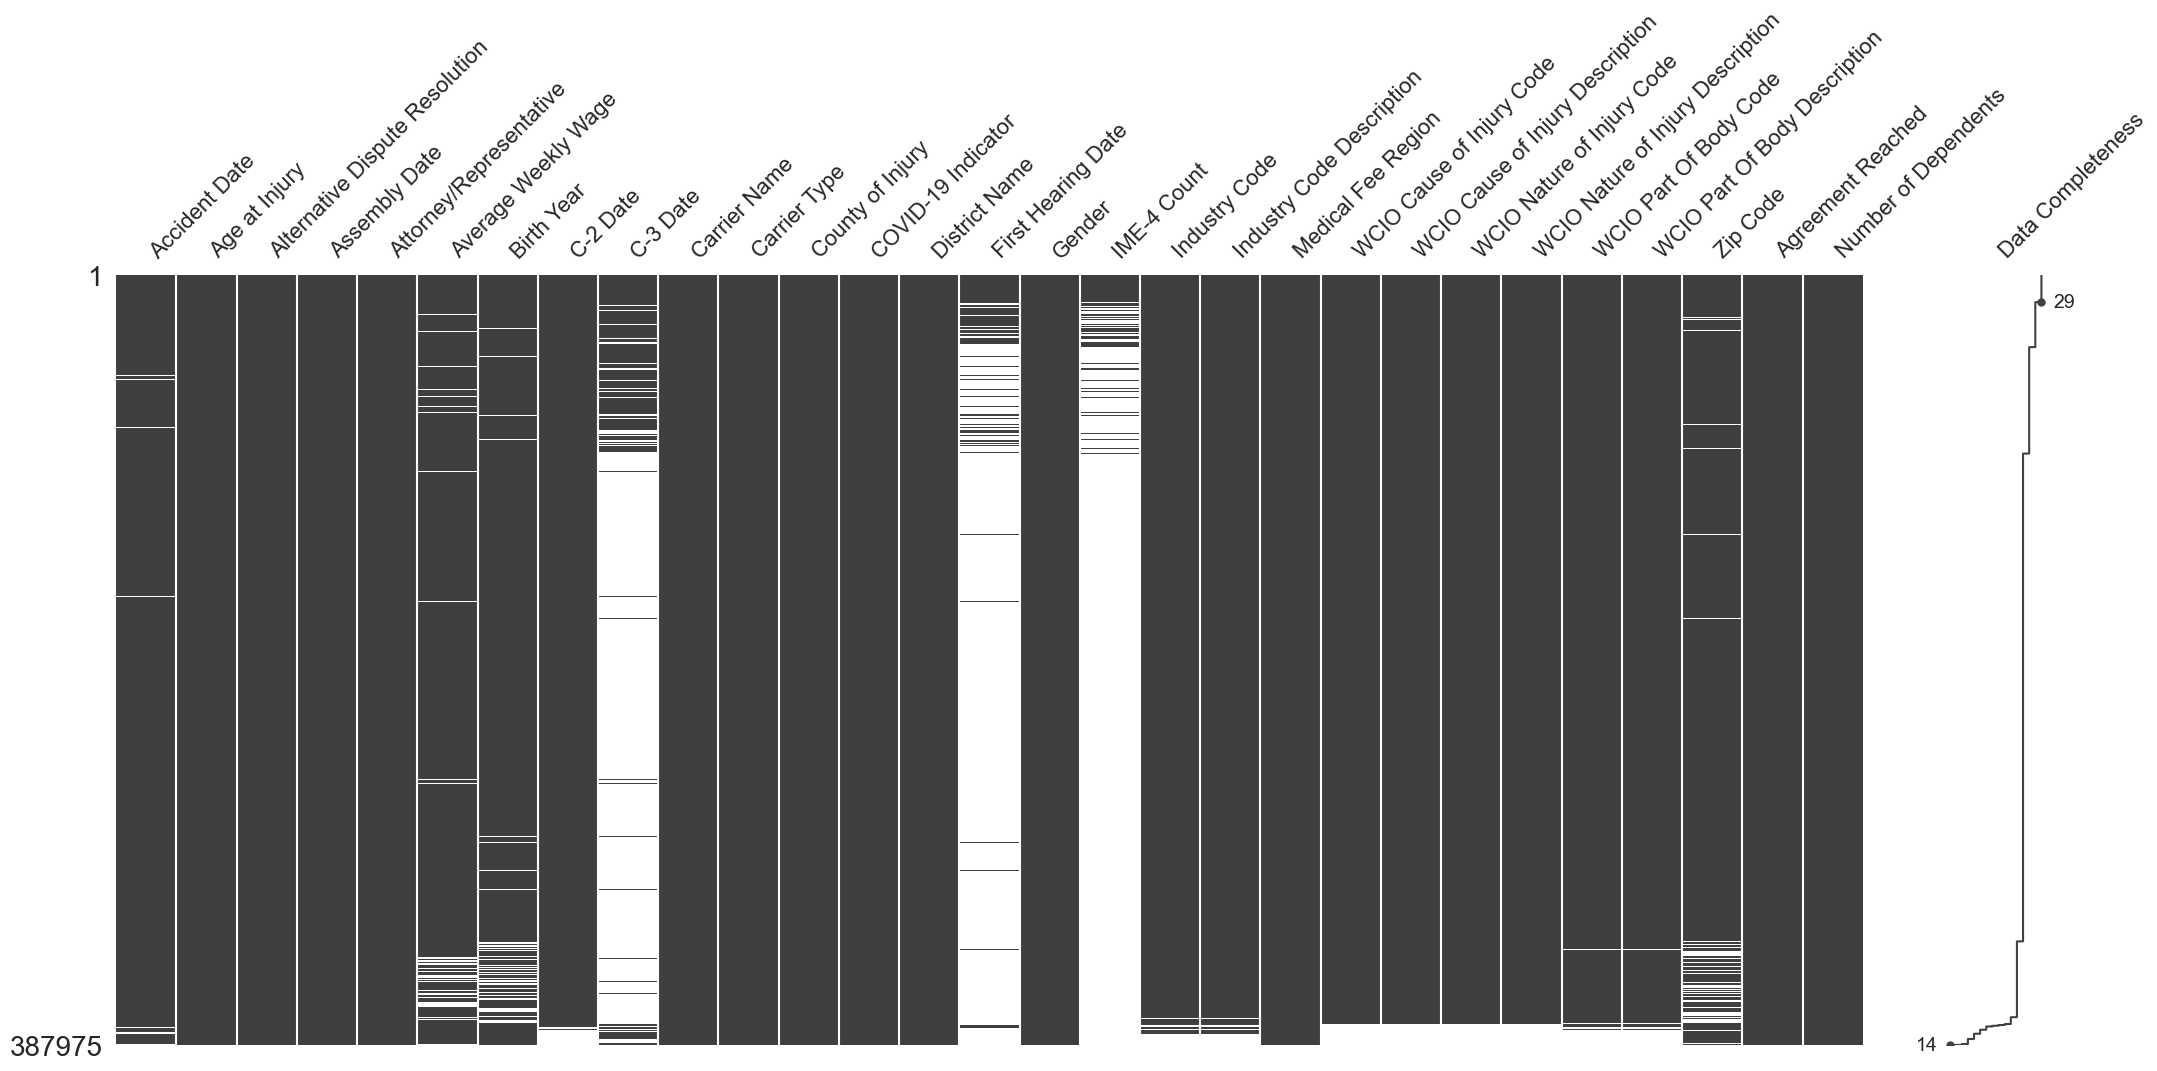

In [27]:
msno.matrix(test, labels=True, sort="descending");

In [28]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

In [29]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 30)
Test dimensions: (387975, 29)


In [30]:
# Eliminates the lines that do not have Claim Injury Type
train.dropna(subset=['Claim Injury Type'], inplace=True)

In [31]:
# Eliminates rows with only 1, 2 or 3 NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
'''train = train.dropna(thresh=4)'''

'train = train.dropna(thresh=4)'

In [32]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (574026, 30)
Test dimensions: (387975, 29)


In [33]:
train.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

In [34]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

#### NaN Median

In [35]:
NaN_median(train, test, ['Accident Date'])

NaN_median(train, test, ['Average Weekly Wage'])

NaN_median(train, test, ['C-2 Date'])

NaN_median(train, test, ['C-3 Date'])

NaN_median(train, test, ['First Hearing Date'])

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

#### Birth Year 

In [36]:
# Replace 0 values ​​with NaN
train['Birth Year'].replace(0, np.nan, inplace=True)
test['Birth Year'].replace(0, np.nan, inplace=True)

# Replace NaN values with subtracting the Accident Year by the Age at Injury 
train['Accident Year'] = train['Accident Date'].dt.year
train['Birth_Year_2'] = train['Accident Year'] - train['Age at Injury']
train['Birth Year'] = train['Birth Year'].fillna(train['Birth_Year_2'])

test['Accident Year'] = test['Accident Date'].dt.year
test['Birth_Year_2'] = test['Accident Year'] - test['Age at Injury']
test['Birth Year'] = test['Birth Year'].fillna(test['Birth_Year_2'])

# The rest of the missing values ​​were filled in with the median
NaN_median(train, test, ['Birth Year'])

train.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)
test.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)

#### IME-4 Count

In [37]:
train['IME-4 Count'] = train['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

#### Zip Code

In [38]:
train['Zip Code'] = train['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else '0'
)

test['Zip Code'] = test['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else '0'
)

# Map the zip codes to integers
zip_code_map = {str(i): i for i in range(10, 100)}

train['Zip Code'] = train['Zip Code'].map(zip_code_map)
test['Zip Code'] = test['Zip Code'].map(zip_code_map)

train['Zip Code'] = train['Zip Code'].fillna(0)
test['Zip Code'] = test['Zip Code'].fillna(0)

print(train['Zip Code'].value_counts())
print()
print('NaN:', train['Zip Code'].isna().sum())

Zip Code
11.0    190002
10.0    105395
14.0     82984
12.0     68102
0.0      61806
         ...  
82.0         4
62.0         4
88.0         3
51.0         2
69.0         1
Name: count, Length: 91, dtype: int64

NaN: 0


####  Replacing NaN with nearest neighbor

In [39]:
'''# Create dictionaries for mapping codes to descriptions
code_maps = {
    'Industry Code': train.dropna(subset=['Industry Code', 'Industry Code Description']).set_index('Industry Code')['Industry Code Description'].to_dict(),
    'WCIO Cause of Injury Code': train.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']).set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].to_dict(),
    'WCIO Nature of Injury Code': train.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']).set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].to_dict(),
    'WCIO Part Of Body Code': train.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']).set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].to_dict()
}

# Split data into numerical and categorical features
train_num = train.select_dtypes(include=[np.number])
test_num = test.select_dtypes(include=[np.number])
train_cat = train.select_dtypes(include=['object'])
test_cat = test.select_dtypes(include=['object'])

# Impute missing values in numerical features
imputer = KNNImputer(n_neighbors=1).fit(train_num)
train_num_imp = imputer.transform(train_num)
test_num_imp = imputer.transform(test_num)

# Convert imputed numerical features back to DataFrames
train_num_df = pd.DataFrame(train_num_imp, columns=train_num.columns, index=train_num.index)
test_num_df = pd.DataFrame(test_num_imp, columns=test_num.columns, index=test_num.index)

# Combine numerical and categorical features
train_combined = pd.concat([train_num_df, train_cat], axis=1)
test_combined = pd.concat([test_num_df, test_cat], axis=1)

# Update original DataFrames
train.update(train_combined)
test.update(test_combined)

# Map codes to descriptions
for code, map_dict in code_maps.items():
    train[f'{code} Description'] = train[code].map(map_dict).fillna(train[f'{code} Description'])
    test[f'{code} Description'] = test[code].map(map_dict).fillna(test[f'{code} Description'])'''

"# Create dictionaries for mapping codes to descriptions\ncode_maps = {\n    'Industry Code': train.dropna(subset=['Industry Code', 'Industry Code Description']).set_index('Industry Code')['Industry Code Description'].to_dict(),\n    'WCIO Cause of Injury Code': train.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']).set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].to_dict(),\n    'WCIO Nature of Injury Code': train.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']).set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].to_dict(),\n    'WCIO Part Of Body Code': train.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']).set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].to_dict()\n}\n\n# Split data into numerical and categorical features\ntrain_num = train.select_dtypes(include=[np.number])\ntest_num = test.select_dtypes(include=[np.numbe

In [40]:
train[float_to_object] = train[float_to_object].astype('object')
test[float_to_object] = test[float_to_object].astype('object')

In [41]:
#fillna just not to waste time with knn for now
train.fillna('u', inplace = True)
test.fillna('u', inplace = True)

In [42]:
train.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Injury Type                    0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code   

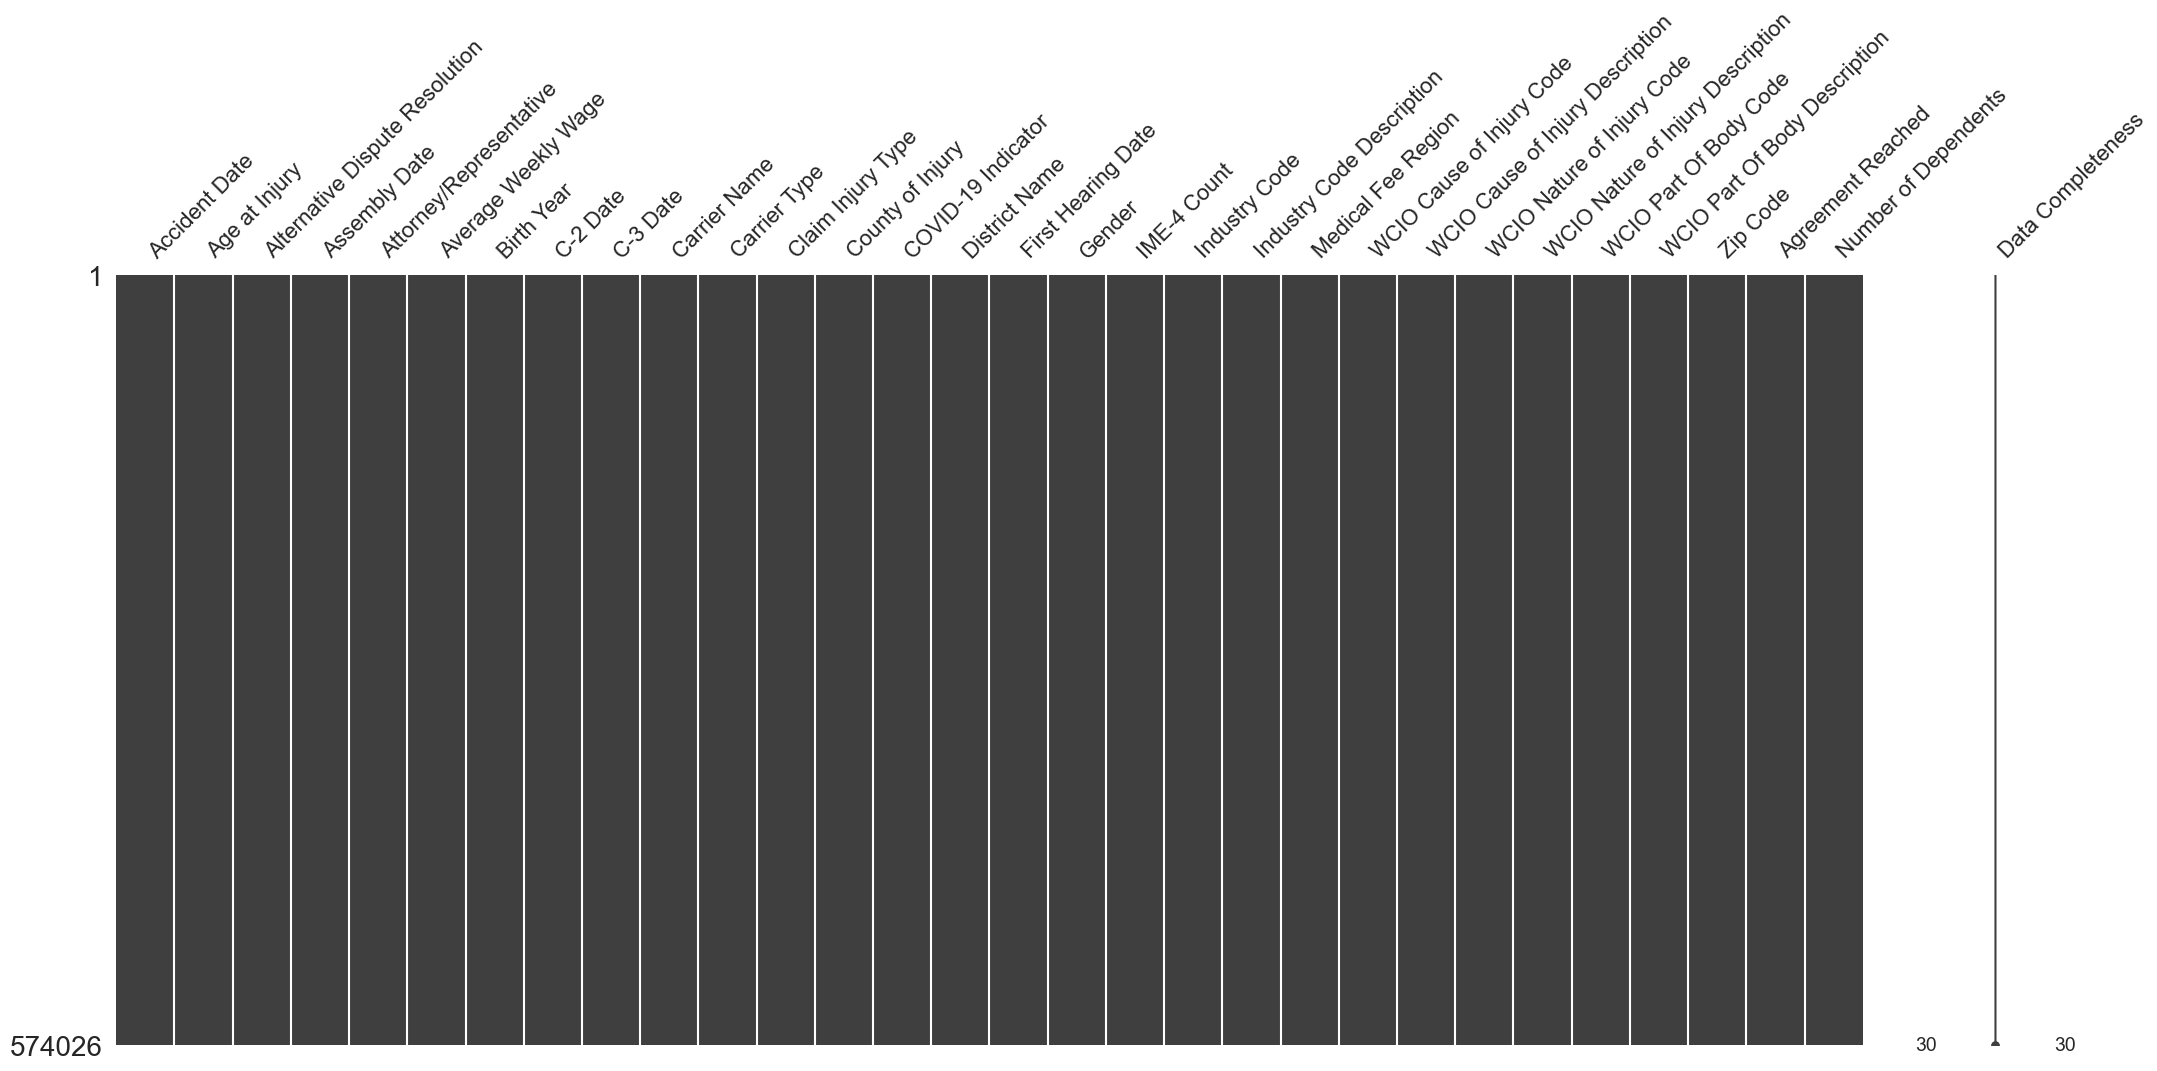

In [43]:
msno.matrix(train, labels=True, sort="descending");

In [44]:
test.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
C-3 Date                             0
Carrier Name                         0
Carrier Type                         0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

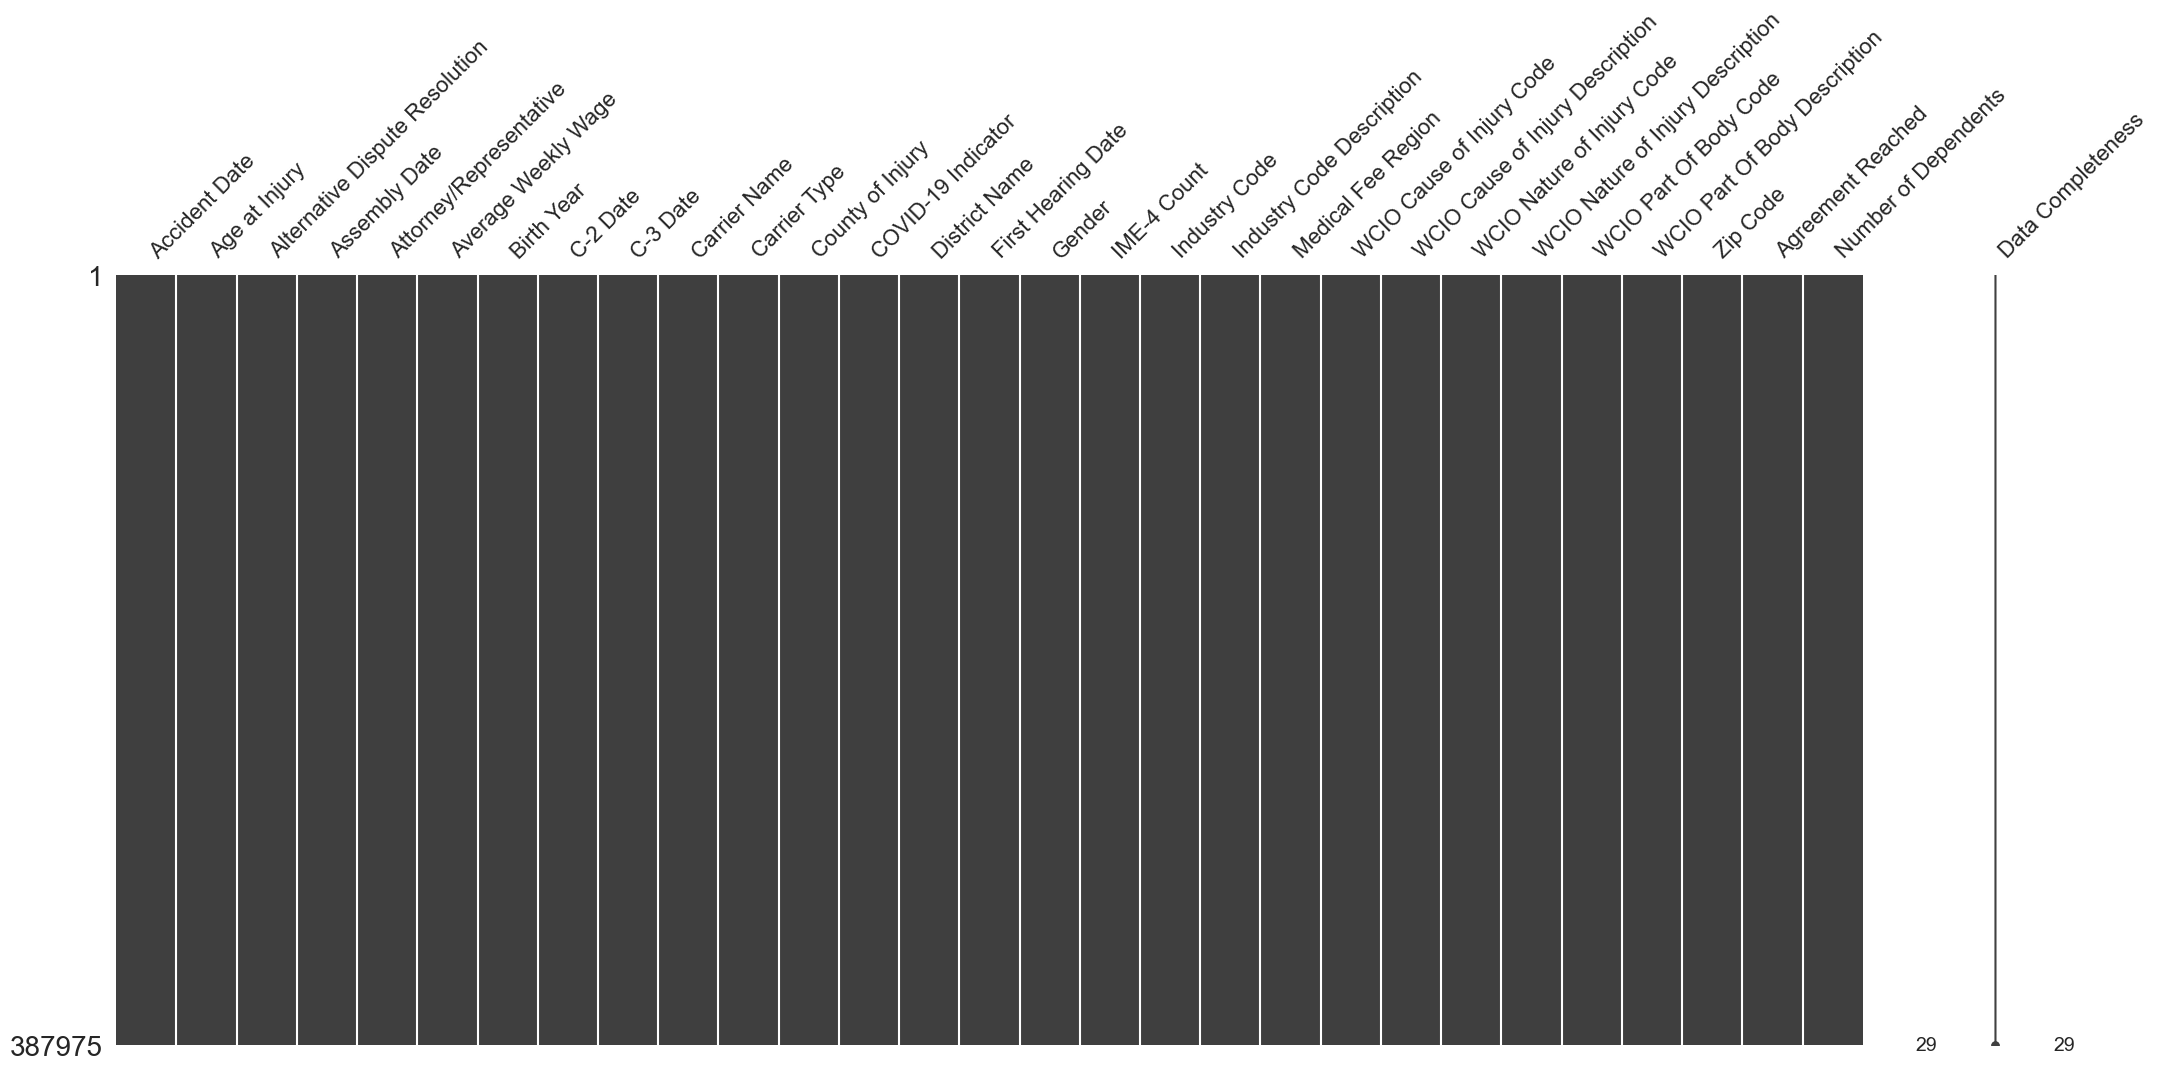

In [45]:
msno.matrix(test, labels=True, sort="descending");

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Feature Engineering
    
</a>



In [46]:
import statistics

def feature_engineering(df, feature_set='basic'):
    df = df.copy()
    print(f"Initial shape: {df.shape}")
    
    # Date feature engineering
    df['Assembly_to_Accident'] = (df['Assembly Date'] - df['Accident Date']).dt.days
    df['C2_to_Accident'] = (df['C-2 Date'] - df['Accident Date']).dt.days
    df['C3_to_Accident'] = (df['C-3 Date'] - df['Accident Date']).dt.days
    df['Hearing_to_Accident'] = (df['First Hearing Date'] - df['Accident Date']).dt.days

    # Age-based features
    df['Age_at_Assembly'] = df['Age at Injury'] + (df['Assembly Date'] - df['Accident Date']).dt.days / 365
    df['Age_at_C2'] = df['Age at Injury'] + (df['C-2 Date'] - df['Accident Date']).dt.days / 365
    df['Age_at_C3'] = df['Age at Injury'] + (df['C-3 Date'] - df['Accident Date']).dt.days / 365
    df['Age_at_Hearing'] = df['Age at Injury'] + (df['First Hearing Date'] - df['Accident Date']).dt.days / 365
    
    # Additional feature engineering
    if 'Average Weekly Wage' in df.columns:
        # Fill missing values with the median wage
        df['Average Weekly Wage'] = df['Average Weekly Wage'].fillna(df['Average Weekly Wage'].median())
    
        # Create a temporary column for wages greater than 0
        positive_wages = df['Average Weekly Wage'] > 0
    
        # Apply qcut to positive wages only
        wage_groups = pd.qcut(
            df.loc[positive_wages, 'Average Weekly Wage'], 
            q=10, 
            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        )
    
    # Assign the results back to the dataframe
    df['Wage_Group'] = 0  # Default to 0 (avg weekly wage = 0)
    df.loc[positive_wages, 'Wage_Group'] = wage_groups.astype(int)  # Overwrite for positive wages

    # Append additional features for 'interactions' and 'full' feature sets
    if feature_set in ['interactions', 'full']:
        # Create interaction features
        if 'Carrier Type' in df.columns and 'Industry Code' in df.columns:
            df['Carrier_Industry'] = df['Carrier Type'].astype(str) + '_' + df['Industry Code'].astype(str)
        if 'District Name' in df.columns and 'County of Injury' in df.columns:
            df['District_County'] = df['District Name'].astype(str) + '_' + df['County of Injury'].astype(str)
        
        # Create missing value indicators
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                df[f'{col}_missing'] = df[col].isnull().astype(int)
    
    # assume 'df' is your DataFrame with the county names
    df['Distance to NYC'] = df['District Name'].map({
        'NYC': 0,
        'ALBANY': 155,
        'HAUPPAUGE': 45,
        'BUFFALO': 373,
        'SYRACUSE': 198,
        'ROCHESTER': 338,
        'BINGHAMTON': 173
    })

    mean_distance = df[df['District Name'] != 'STATEWIDE']['Distance to NYC'].mean()
    df.loc[df['District Name'] == 'STATEWIDE', 'Distance to NYC'] = mean_distance

    # Assuming df_train is your DataFrame
    counties = { "SUFFOLK": 45.4, "QUEENS": 8.5, "KINGS": 7.5, "NASSAU": 20.1,
            "BRONX": 10.3, "ERIE": 371.1, "NEW YORK": 0, "WESTCHESTER": 20.5,
            "MONROE": 334.8, "ORANGE": 59.5, "ONONDAGA": 194.8, "RICHMOND": 17.1,
            "ALBANY": 155.1, "DUTCHESS": 76.3, "ROCKLAND": 30.8, "SARATOGA": 143.1, 
            "NIAGARA": 373.9, "BROOME": 173.1, "ONEIDA": 203.1, "RENSSELAER": 145.9, 
            "ULSTER": 86.3, "CAYUGA": 221.9, "HERKIMER": 213.9, "CHAUTAUQUA": 407.9, 
            "ONTARIO": 264.9, "CHEMUNG": 201.9, "OSWEGO": 243.9, "FULTON": 223.1, 
            "PUTNAM": 51.9, "ST. LAWRENCE": 314.9, "JEFFERSON": 341.1, "CLINTON": 304.9, 
            "CATTARAUGUS": 371.9, "SULLIVAN": 97.3, "GENESEE": 344.9, "COLUMBIA": 120.1,
            "MADISON": 193.9, "WARREN": 194.9, "LIVINGSTON": 276.9, "DELAWARE": 137.1,
            "WASHINGTON": 204.9, "GREENE": 124.9, "ALLEGANY": 346.9, "WAYNE": 294.9,
            "CHENANGO": 181.9, "TOMPKINS": 209.9, "ORLEANS": 323.9, "SCHENECTADY": 156.1,
            "FRANKLIN": 294.9, "SENECA": 234.9, "LEWIS": 266.9, "TIOGA": 187.1, "STEUBEN": 246.9, 
            "ESSEX": 214.9, "SCHUYLER": 206.1, "OTSEGO": 165.1, "CORTLAND": 193.9, 
            "WYOMING": 313.9, "MONTGOMERY": 173.9, "SCHOHARIE": 146.1, "YATES": 243.9,"HAMILTON": 221.9
    }

    # Create a list of distances
    distances = list(counties.values())

    # Calculate the mean distance
    mean_distance = statistics.mean(distances)

    # Add the "UNKNOWN" county to the dictionary with the mean distance
    counties["UNKNOWN"] = mean_distance

    # Create a new column in the df_train DataFrame called distance_of_county
    df['distance_of_county'] = df['County of Injury'].map(counties).fillna(mean_distance)

    print(f"Shape after feature engineering: {df.shape}")
    return df

train = feature_engineering(train, 'basic')
test = feature_engineering(test, 'basic')

Initial shape: (574026, 30)
Shape after feature engineering: (574026, 41)
Initial shape: (387975, 29)
Shape after feature engineering: (387975, 40)


In [47]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,C2_to_Accident,C3_to_Accident,Hearing_to_Accident,Age_at_Assembly,Age_at_C2,Age_at_C3,Age_at_Hearing,Wage_Group,Distance to NYC,distance_of_county
count,574026,574026.0,574026,574026,574026,5.740260e+05,574026.0,574026,574026,574026,...,574026.000000,574026.000000,574026.000000,574026.0,574026.0,574026.0,574026.0,574026.000000,574026.000000,574026.000000
unique,NaN,<NA>,3,NaN,2,NaN,<NA>,NaN,NaN,2046,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
top,NaN,<NA>,N,NaN,N,NaN,<NA>,NaN,NaN,STATE INSURANCE FUND,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
freq,NaN,<NA>,571412,NaN,392291,NaN,<NA>,NaN,NaN,111144,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
mean,2021-04-29 06:07:37.041318400,42.11427,NaN,2021-07-19 19:01:36.894565888,NaN,4.665769e+02,1977.975834,2021-07-17 10:17:12.613853696,2021-07-22 22:09:53.107630336,NaN,...,79.173328,84.668242,316.427857,42.33766,42.331183,42.346238,42.981196,2.011378,104.175830,106.282569
min,1961-09-06 00:00:00,0.0,NaN,2020-01-01 00:00:00,NaN,0.000000e+00,1900.0,1996-01-12 00:00:00,1992-11-13 00:00:00,NaN,...,-8842.000000,-9870.000000,-576.000000,-1.484932,-21.394521,-11.128767,-1.336986,0.000000,0.000000,0.000000
25%,2020-09-16 00:00:00,31.0,NaN,2020-10-27 00:00:00,NaN,0.000000e+00,1967.0,2020-11-13 00:00:00,2021-07-21 00:00:00,NaN,...,5.000000,-139.000000,58.000000,31.013699,31.013699,30.934247,31.473973,0.000000,0.000000,10.300000
50%,2021-06-27 00:00:00,42.0,NaN,2021-07-30 00:00:00,NaN,0.000000e+00,1978.0,2021-08-09 00:00:00,2021-07-21 00:00:00,NaN,...,10.000000,23.000000,238.000000,42.030137,42.030137,42.079452,42.750685,0.000000,45.000000,45.400000
75%,2022-03-19 00:00:00,54.0,NaN,2022-04-19 00:00:00,NaN,7.956575e+02,1990.0,2022-04-19 00:00:00,2021-07-21 00:00:00,NaN,...,29.000000,205.000000,499.000000,54.019178,54.016438,54.027397,54.578082,4.000000,173.000000,194.800000
max,2023-09-29 00:00:00,117.0,NaN,2022-12-31 00:00:00,NaN,2.828079e+06,2022.0,2024-06-01 00:00:00,2024-05-31 00:00:00,NaN,...,21503.000000,21868.000000,22099.000000,121.868493,121.868493,121.452055,122.084932,10.000000,373.000000,407.900000


<hr>
<a class="anchor" id="outliers">
    
## 4.4 Outliers
    
</a>

In [48]:
numeric_cols = train.select_dtypes(include=np.number).set_index(train.index)

In [49]:
'''# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_cols.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_cols.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=numeric_cols[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()'''

'# All Numeric Variables\' Box Plots in one figure\nsns.set()\n\n# Prepare figure. Create individual axes where each box plot will be placed\nfig, axes = plt.subplots(2, ceil(len(numeric_cols.columns) / 2), figsize=(20, 11))\n\n# Plot data\n# Iterate across axes objects and associate each box plot (hint: use the ax argument):\nfor ax, feat in zip(axes.flatten(), numeric_cols.columns): # Notice the zip() function and flatten() method\n    sns.boxplot(x=numeric_cols[feat], ax=ax)\n    \n# Layout\n# Add a centered title to the figure:\ntitle = "Numeric Variables\' Box Plots"\n\nplt.suptitle(title)\nplt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title\nplt.show()'

Age at injury: some outliers    
Average Weekly Wage: understandable because we have many volunteers   
Birth Year: the same as age at injury, because we use age at injury to correct birth year     
IME-4 Count: some outliers     
Number of dependents: all good

In [50]:
# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

<hr>
<a class="anchor" id="outageatinjury">
    
### 4.4.1 Age at Injury
    
</a>

In [51]:
train_data_cleaned_age = train[(train['Age at Injury'] >= 14) & (train['Age at Injury'] <= 90)]
print(f"Number of rows removed: {len(train) - len(train_data_cleaned_age)}")

Number of rows removed: 5677


<hr>
<a class="anchor" id="outbirthyear">
    
### 4.4.2 Birth Year
    
</a>

In [52]:
outliers_train = identify_outliers_iqr_column(train_data_cleaned_age, 'Birth Year')
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_age.index, fill_value=False)
print(f"Number of outliers in 'Birth Year': {outliers_train.sum()}")
train_data_cleaned_birth = train_data_cleaned_age[~outliers_aligned_train]

Number of outliers in 'Birth Year': 93


### Accident Year

In [53]:
train_data_cleaned_acc_year = train_data_cleaned_birth[train['Accident Date'] > pd.to_datetime('1980-01-01')]
print(f"Number of outliers in 'Accident Date': {len(train_data_cleaned_birth) - len(train_data_cleaned_acc_year)}")

Number of outliers in 'Accident Date': 29


In [54]:
train_data_cleaned = train_data_cleaned_acc_year

<hr>
<a class="anchor" id="outaverageweeklywage">
    
### 4.4.3 Average Weekly Wage
    
</a>
1/3 are non-voluntary, so the majority is voluntary <br>        
Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [55]:
'''not_voluntary_train = train_data_cleaned_birth[train_data_cleaned_birth['Average Weekly Wage'] != 0]'''

"not_voluntary_train = train_data_cleaned_birth[train_data_cleaned_birth['Average Weekly Wage'] != 0]"

In [56]:
'''# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Average Weekly Wage')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_birth.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
train_data_cleaned = train_data_cleaned_birth[~outliers_aligned_train]

# Verify the cleaned DataFrame
print(train.shape)
print("Shape after removing outliers:", train_data_cleaned.shape)'''

'# Identify outliers for the \'Average Weekly Wage\' column\noutliers_train = identify_outliers_iqr_column(not_voluntary_train, \'Average Weekly Wage\')\n\n# Align the index of the outliers Series with X_train_num\noutliers_aligned_train = outliers_train.reindex(train_data_cleaned_birth.index, fill_value=False)\n\n# Print the number of outliers in the \'Average Weekly Wage\' column\nprint(f"Number of outliers in \'Average Weekly Wage\': {outliers_train.sum()}")\n\n# Remove outliers from the \'Average Weekly Wage\' column\ntrain_data_cleaned = train_data_cleaned_birth[~outliers_aligned_train]\n\n# Verify the cleaned DataFrame\nprint(train.shape)\nprint("Shape after removing outliers:", train_data_cleaned.shape)'

In [57]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,C2_to_Accident,C3_to_Accident,Hearing_to_Accident,Age_at_Assembly,Age_at_C2,Age_at_C3,Age_at_Hearing,Wage_Group,Distance to NYC,distance_of_county
count,574026,574026.0,574026,574026,574026,5.740260e+05,574026.0,574026,574026,574026,...,574026.000000,574026.000000,574026.000000,574026.0,574026.0,574026.0,574026.0,574026.000000,574026.000000,574026.000000
unique,NaN,<NA>,3,NaN,2,NaN,<NA>,NaN,NaN,2046,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
top,NaN,<NA>,N,NaN,N,NaN,<NA>,NaN,NaN,STATE INSURANCE FUND,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
freq,NaN,<NA>,571412,NaN,392291,NaN,<NA>,NaN,NaN,111144,...,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN
mean,2021-04-29 06:07:37.041318400,42.11427,NaN,2021-07-19 19:01:36.894565888,NaN,4.665769e+02,1977.975834,2021-07-17 10:17:12.613853696,2021-07-22 22:09:53.107630336,NaN,...,79.173328,84.668242,316.427857,42.33766,42.331183,42.346238,42.981196,2.011378,104.175830,106.282569
min,1961-09-06 00:00:00,0.0,NaN,2020-01-01 00:00:00,NaN,0.000000e+00,1900.0,1996-01-12 00:00:00,1992-11-13 00:00:00,NaN,...,-8842.000000,-9870.000000,-576.000000,-1.484932,-21.394521,-11.128767,-1.336986,0.000000,0.000000,0.000000
25%,2020-09-16 00:00:00,31.0,NaN,2020-10-27 00:00:00,NaN,0.000000e+00,1967.0,2020-11-13 00:00:00,2021-07-21 00:00:00,NaN,...,5.000000,-139.000000,58.000000,31.013699,31.013699,30.934247,31.473973,0.000000,0.000000,10.300000
50%,2021-06-27 00:00:00,42.0,NaN,2021-07-30 00:00:00,NaN,0.000000e+00,1978.0,2021-08-09 00:00:00,2021-07-21 00:00:00,NaN,...,10.000000,23.000000,238.000000,42.030137,42.030137,42.079452,42.750685,0.000000,45.000000,45.400000
75%,2022-03-19 00:00:00,54.0,NaN,2022-04-19 00:00:00,NaN,7.956575e+02,1990.0,2022-04-19 00:00:00,2021-07-21 00:00:00,NaN,...,29.000000,205.000000,499.000000,54.019178,54.016438,54.027397,54.578082,4.000000,173.000000,194.800000
max,2023-09-29 00:00:00,117.0,NaN,2022-12-31 00:00:00,NaN,2.828079e+06,2022.0,2024-06-01 00:00:00,2024-05-31 00:00:00,NaN,...,21503.000000,21868.000000,22099.000000,121.868493,121.868493,121.452055,122.084932,10.000000,373.000000,407.900000


<hr>
<a class="anchor" id="datapartition">
    
## 4.5 Data Partition
    
</a>

In [58]:
X = train_data_cleaned.drop(['Claim Injury Type'], axis = 1)
y = train_data_cleaned['Claim Injury Type']

X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.75,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

# For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

# For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# For test
X_test_num = test.select_dtypes(include=np.number).set_index(test.index)
X_test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)

<hr>
<a class="anchor" id="categorical">
    
## 4.6 Categorical Columns as Numerical
</a>

In [59]:
X_train_cat = X_train_cat.astype(str)
X_train_cat.columns

Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description'],
      dtype='object')

In [60]:
# Convert all categorical columns to strings
X_train_cat = X_train_cat.astype(str)
X_val_cat = X_val_cat.astype(str)
X_test_cat = X_test_cat.astype(str)

enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat_lab = enc1.fit_transform(X_train_cat)
X_val_cat_lab = enc1.transform(X_val_cat)
X_test_cat_lab = enc1.transform(X_test_cat)
#X_train_cat_lab

In [61]:
X_train_cat_df = pd.DataFrame(X_train_cat_lab, columns=X_train_cat.columns, index=X_train_cat.index)
#X_train_cat_df

In [62]:
X_val_cat_df = pd.DataFrame(X_val_cat_lab, columns=X_val_cat.columns, index=X_val_cat.index)
#X_val_cat_df

In [63]:
X_test_cat_df = pd.DataFrame(X_test_cat_lab, columns=X_test_cat.columns, index=X_test_cat.index)
#X_test_cat_df

In [64]:
enc2 = LabelEncoder() #encoder for labels
y_train = enc2.fit_transform(y_train)
y_val = enc2.transform(y_val)

In [65]:
y_train, y_val

(array([1, 1, 1, ..., 2, 1, 1]), array([1, 3, 1, ..., 1, 1, 3]))

<hr>
<a class="anchor" id="scaling">
    
## 4.7 Scaling
    
</a>

In [66]:
X_train_combined = pd.concat([X_train_num, X_train_cat_df], axis=1)
X_val_combined = pd.concat([X_val_num, X_val_cat_df], axis=1)
X_test_combined = pd.concat([X_test_num, X_test_cat_df], axis=1)

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scaler_method(method='minmax'):
    
    if method == 'minmax':
        return MinMaxScaler()
    elif method == 'standard':
        return StandardScaler()
    elif method == 'robust':
        return RobustScaler()
    else:
        raise ValueError("Invalid scaling method. Options are 'minmax' and 'standard'.")


scaler = scaler_method('standard')

X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_train_combined_scaled = pd.DataFrame(X_train_combined_scaled, index=X_train_combined.index, columns=X_train_combined.columns)

In [68]:
X_val_combined_scaled = scaler.transform(X_val_combined)
X_val_combined_scaled = pd.DataFrame(X_val_combined_scaled, index=X_val_combined.index, columns=X_val_combined.columns)
#X_val_num_scaled

In [69]:
X_test_combined_scaled = scaler.transform(X_test_combined)
X_test_combined_scaled = pd.DataFrame(X_test_combined_scaled, index=X_test_combined.index, columns=X_test_combined.columns)
#X_test_num_scaled

<hr>
<a class="anchor" id="featureselection">
    
# 5. Feature selection
    
</a>

In [70]:
X_test_combined_scaled.var()

Age at Injury                        1.125673e+00
Average Weekly Wage                  2.781008e-01
Birth Year                           1.080913e+00
IME-4 Count                          1.514041e-01
Zip Code                             9.941085e-01
Agreement Reached                    1.008890e-01
Number of Dependents                 9.960562e-01
Assembly_to_Accident                 1.014965e+00
C2_to_Accident                       1.038104e+00
C3_to_Accident                       1.179723e+00
Hearing_to_Accident                  9.801126e-01
Age_at_Assembly                      1.114397e+00
Age_at_C2                            1.117506e+00
Age_at_C3                            1.121064e+00
Age_at_Hearing                       1.114654e+00
Wage_Group                           4.595278e-01
Distance to NYC                      1.018678e+00
distance_of_county                   1.015948e+00
Accident Date                        1.377769e+01
Alternative Dispute Resolution       9.394685e-01


<hr>
<a class="anchor" id="correlations">
    
## 5.1 Correlations
    
</a>

In [71]:
def cor_heatmap(data):
    
    corr = data.corr(method='pearson')
    
    corr_masked = corr.copy()
    corr_masked[(corr_masked > -0.5) & (corr_masked < 0.5)] = np.nan

    mask = np.triu(np.ones_like(corr_masked, dtype=bool))

    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='RdBu', vmax=1, vmin=-1, center=0,
                square=True, annot=True, annot_kws={'size': 10}, linewidths=0.5, cbar_kws={"shrink": 0.5},
                fmt='.1f')

    for text in ax.texts:
        if abs(float(text.get_text())) < 0.3:
            text.set_text('') 

    plt.show()

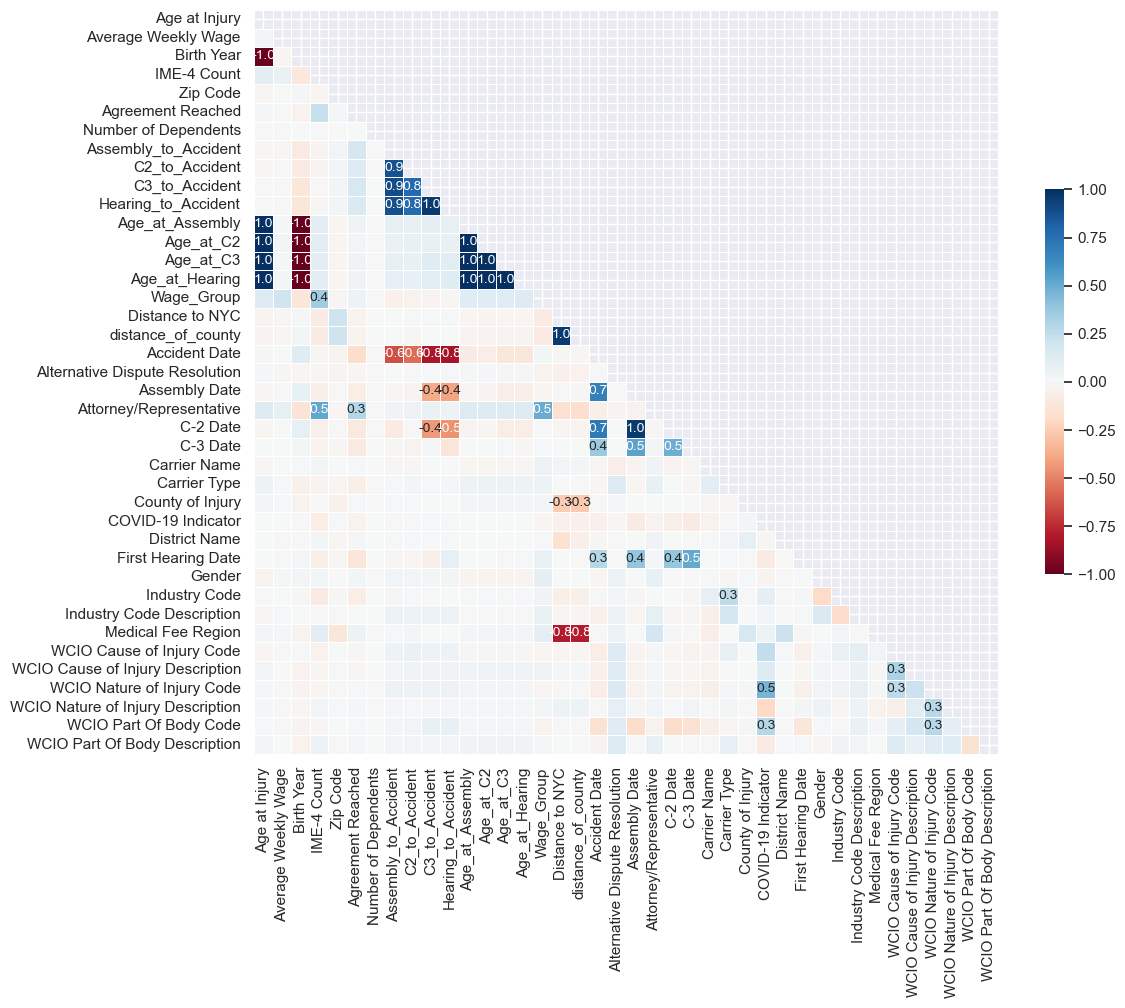

In [72]:
cor_heatmap(X_val_combined_scaled)

In [73]:
X_train_combined_scaled.shape, X_train_cat_df.shape, X_train_combined.shape

((426170, 40), (426170, 22), (426170, 40))

### PCA

In [74]:
df_pca = X_train_num
df_pca.shape

(426170, 18)

In [75]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca)

In [76]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results

,Eigenvalue,Difference,Proportion,Cumulative
1,4.289263e+07,0.000000e+00,9.689154e-01,0.968915
2,1.221808e+06,-4.167083e+07,2.759982e-02,0.996515
3,7.992802e+04,-1.141880e+06,1.805519e-03,0.998321
4,3.147599e+04,-4.845202e+04,7.110212e-04,0.999032
5,2.505295e+04,-6.423043e+03,5.659290e-04,0.999598
6,1.592610e+04,-9.126848e+03,3.597598e-04,0.999957
7,1.118764e+03,-1.480734e+04,2.527212e-05,0.999983
8,7.098946e+02,-4.088697e+02,1.603604e-05,0.999999
9,3.857336e+01,-6.713213e+02,8.713458e-07,1.000000
10,1.024651e+01,-2.832685e+01,2.314617e-07,1.000000


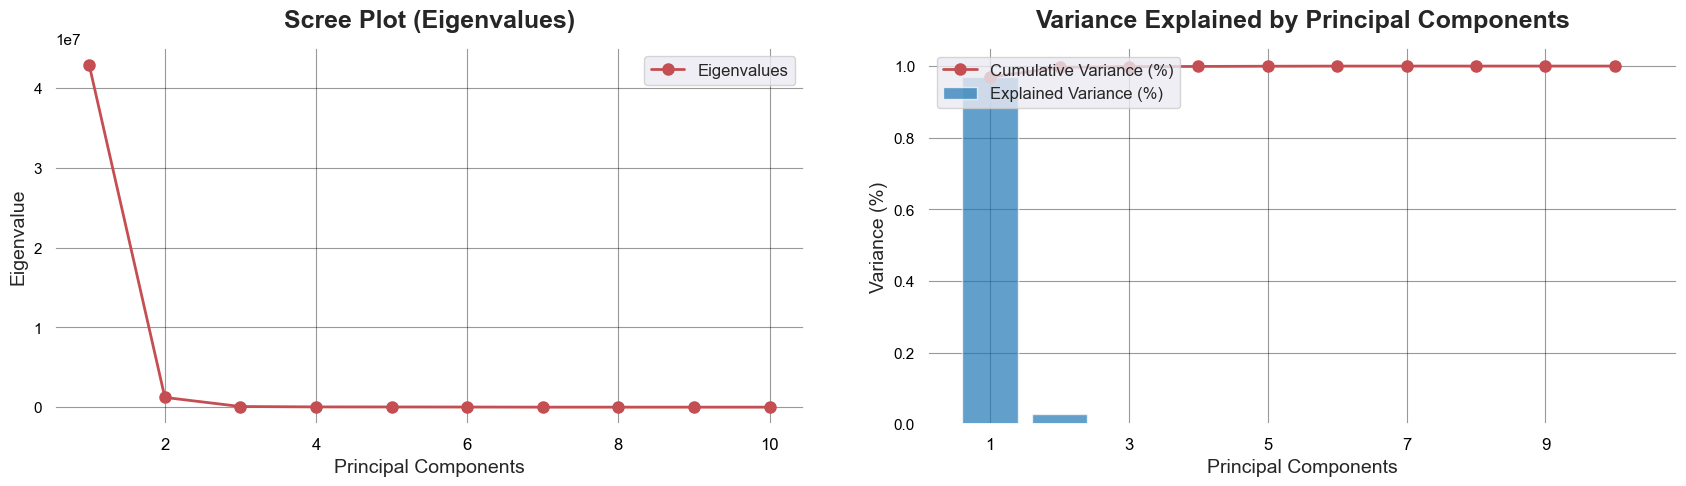

In [77]:
n_pcas = 10

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), facecolor='white')

# Plot 1: Scree Plot (Eigenvalues)
ax1.plot(range(1, n_pcas + 1), explained_variance[:n_pcas], 'ro-', linewidth=2, markersize=8, label='Eigenvalues')
ax1.set_title("Scree Plot (Eigenvalues)", fontsize=18, pad=15, fontweight='bold')
ax1.set_xlabel("Principal Components", fontsize=14)
ax1.set_ylabel("Eigenvalue", fontsize=14)
ax1.set_xticks(range(2, n_pcas + 1, 2))
ax1.set_xticklabels(range(2, n_pcas + 1, 2), fontsize=12)
ax1.set_facecolor('white')
ax1.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax1.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility
ax1.legend(fontsize=12, loc='upper right')

# Plot 2: Explained Variance as a Bar Chart (up to 30 PCs)
ax2.bar(range(1, n_pcas + 1), explained_variance_ratio[:n_pcas], 
        color='#1f77b4', alpha=0.7, label='Explained Variance (%)', width=0.8)  # Customize bar color
ax2.plot(range(1, n_pcas + 1), cumulative_explained_variance_ratio[:n_pcas], 
         'ro-', linewidth=2, markersize=8, label='Cumulative Variance (%)')

# Customize the plot
ax2.set_title("Variance Explained by Principal Components", fontsize=18, pad=15, fontweight='bold')
ax2.set_xlabel("Principal Components", fontsize=14)
ax2.set_ylabel("Variance (%)", fontsize=14)
ax2.set_xticks(range(1, n_pcas + 1, 2))  # Show every 2nd PC for clarity
ax2.set_xticklabels(range(1, n_pcas + 1, 2), fontsize=12)
ax2.set_facecolor('white')
ax2.grid(True, color='black', linestyle='-', linewidth=0.8, alpha=0.4)  # Lighter grid lines
ax2.tick_params(axis='both', which='both', colors='black', width=1)  # Black ticks with better visibility

# Add legend
ax2.legend(fontsize=12, loc='upper left')

# Adjust layout to ensure everything fits and has proper padding
plt.tight_layout(pad=4.0)

# Show plot
plt.show()


In [78]:
# we decided to retain 5 PCAs as its an Elbow and allows us to retain around 80% of variance as well as around 1 PC variance
pca = PCA(n_components=5)
pca_feat = pca.fit_transform(df_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  

In [79]:
df_pca_final = pd.concat([df_pca, pca_df], axis=1)
correlation_matrix = df_pca_final[pca_feat_names + df_pca.columns.tolist()].corr()
loadings = correlation_matrix.loc[pca_feat_names, df_pca.columns]

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

loadings.style.applymap(_color_red_or_green)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Zip Code,Agreement Reached,Number of Dependents,Assembly_to_Accident,C2_to_Accident,C3_to_Accident,Hearing_to_Accident,Age_at_Assembly,Age_at_C2,Age_at_C3,Age_at_Hearing,Wage_Group,Distance to NYC,distance_of_county
PC0,0.013135,1.000000,-0.012735,0.035725,-0.001039,0.005023,-0.000991,-0.005897,-0.004079,-0.002779,-0.001035,0.012424,0.012677,0.012701,0.012910,0.117160,-0.010248,-0.010646
PC1,-0.009981,0.000096,-0.110610,-0.018681,0.031313,0.168390,-0.000089,0.960078,0.894780,0.973102,0.967388,0.096511,0.080548,0.109649,0.111355,-0.032353,0.006438,0.002509
PC2,-0.023412,0.000010,0.046038,-0.031574,0.006427,-0.019182,0.001540,0.158905,0.415188,-0.171619,-0.204937,-0.005693,0.018659,-0.044333,-0.048932,-0.037989,-0.042954,-0.045428
PC3,-0.024685,0.000008,0.025728,-0.087573,0.205871,-0.030174,0.000475,0.023731,-0.008039,-0.002844,-0.011134,-0.021947,-0.025413,-0.024860,-0.025902,-0.092394,0.985379,0.984852
PC4,-0.010101,0.000004,0.015686,-0.016190,-0.010328,0.073437,0.001473,0.223057,-0.162253,0.008345,-0.083260,0.014674,-0.026476,-0.009005,-0.020465,-0.060302,-0.075226,-0.071513


<hr>
<a class="anchor" id="chisquare">
    
## 5.2 Chi-Square
    
</a>

In [80]:
#is not giving relevant information for now
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result=p, "{0} is IMPORTANT for Prediction".format(var)
    else:
        result=p, "{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in X_train_cat_df:
    TestIndependence(X_train_cat_df[var],y_train, var)

(0.0, 'Accident Date is IMPORTANT for Prediction')
(0.0, 'Alternative Dispute Resolution is IMPORTANT for Prediction')
(0.0, 'Assembly Date is IMPORTANT for Prediction')
(0.0, 'Attorney/Representative is IMPORTANT for Prediction')
(0.0, 'C-2 Date is IMPORTANT for Prediction')
(0.0, 'C-3 Date is IMPORTANT for Prediction')
(0.0, 'Carrier Name is IMPORTANT for Prediction')
(0.0, 'Carrier Type is IMPORTANT for Prediction')
(0.0, 'County of Injury is IMPORTANT for Prediction')
(0.0, 'COVID-19 Indicator is IMPORTANT for Prediction')
(0.0, 'District Name is IMPORTANT for Prediction')
(0.0, 'First Hearing Date is IMPORTANT for Prediction')
(0.0, 'Gender is IMPORTANT for Prediction')
(0.0, 'Industry Code is IMPORTANT for Prediction')
(0.0, 'Industry Code Description is IMPORTANT for Prediction')
(0.0, 'Medical Fee Region is IMPORTANT for Prediction')
(0.0, 'WCIO Cause of Injury Code is IMPORTANT for Prediction')
(0.0, 'WCIO Cause of Injury Description is IMPORTANT for Prediction')
(0.0, 'WCIO N

<hr>
<a class="anchor" id="lassocv">
    
## 5.3 LassoCV
    
</a>

In [81]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [82]:
reg = LassoCV()
reg.fit(X_train_combined_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_combined_scaled.columns)
coef

Age at Injury                       -0.000000
Average Weekly Wage                 -0.000806
Birth Year                           0.000000
IME-4 Count                          0.089123
Zip Code                             0.010804
Agreement Reached                    0.106070
Number of Dependents                -0.000000
Assembly_to_Accident                 0.052305
C2_to_Accident                      -0.025932
C3_to_Accident                       0.000000
Hearing_to_Accident                  0.042739
Age_at_Assembly                     -0.000000
Age_at_C2                           -0.005047
Age_at_C3                           -0.000000
Age_at_Hearing                      -0.000000
Wage_Group                           0.641798
Distance to NYC                     -0.000000
distance_of_county                   0.045869
Accident Date                        0.095894
Alternative Dispute Resolution       0.003005
Assembly Date                       -0.079837
Attorney/Representative           

In [83]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 30 variables and eliminated the other 10 variables


In [84]:
coef.sort_values()

Assembly Date                       -0.079837
WCIO Cause of Injury Code           -0.063852
WCIO Nature of Injury Code          -0.050543
C-3 Date                            -0.043183
Medical Fee Region                  -0.028345
C2_to_Accident                      -0.025932
WCIO Part Of Body Description       -0.019455
Industry Code                       -0.015578
WCIO Part Of Body Code              -0.013887
Gender                              -0.013090
Industry Code Description           -0.011030
Carrier Type                        -0.006759
Age_at_C2                           -0.005047
COVID-19 Indicator                  -0.002279
WCIO Cause of Injury Description    -0.002154
Average Weekly Wage                 -0.000806
First Hearing Date                  -0.000000
C-2 Date                             0.000000
Age at Injury                       -0.000000
Distance to NYC                     -0.000000
Birth Year                           0.000000
Age_at_Hearing                    

In [85]:
columns_to_keep = coef[coef != 0].index
columns_to_keep
X_train_columns_to_keep = X_train_combined_scaled[columns_to_keep]
X_val_columns_to_keep = X_val_combined_scaled[columns_to_keep]
X_test_columns_to_keep = X_test_combined_scaled[columns_to_keep]

we decide to keep IME-4 Count due to his correlation with the target variable

#### Decision Trees

In [86]:
gini_importance = DecisionTreeClassifier().fit(X_train_columns_to_keep, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_columns_to_keep, y_train).feature_importances_

<Axes: xlabel='Value', ylabel='Col'>

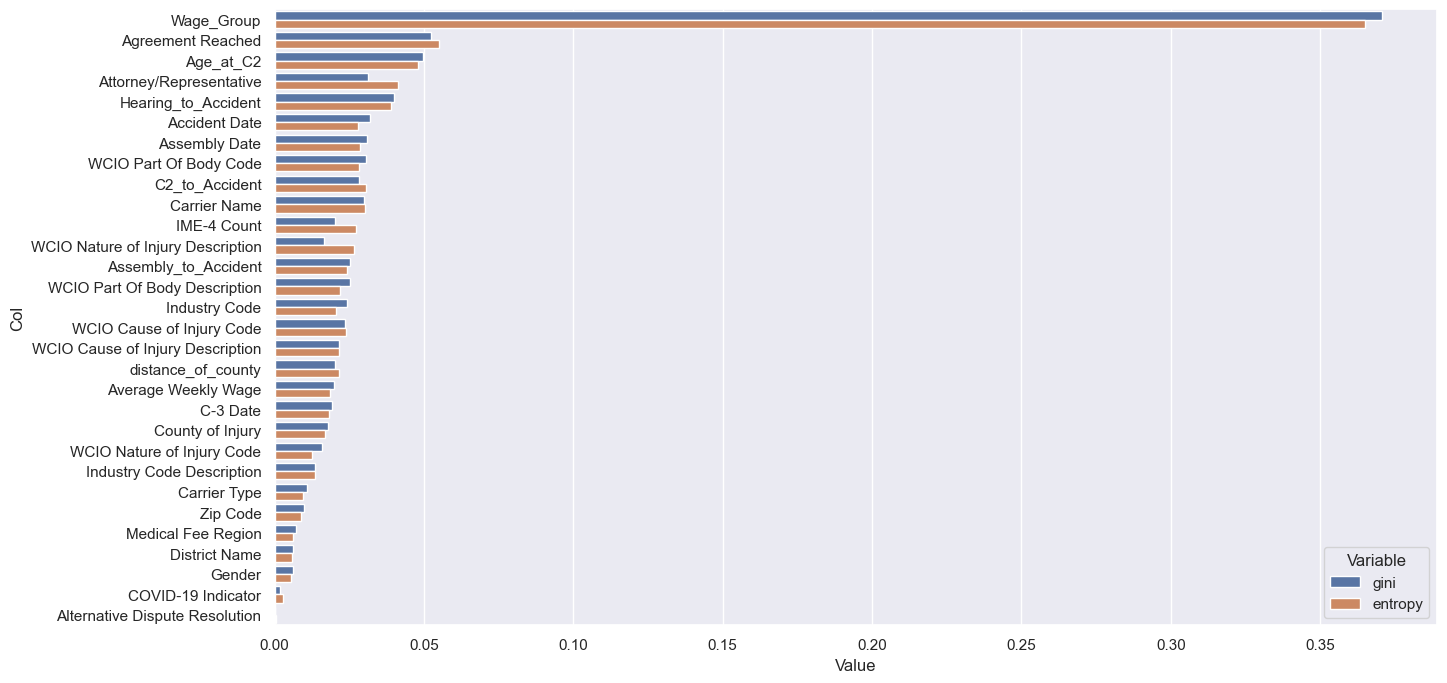

In [87]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_columns_to_keep.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [88]:
X_train_columns_to_keep.drop('Alternative Dispute Resolution', axis = 1, inplace = True)
X_test_columns_to_keep.drop('Alternative Dispute Resolution', axis = 1, inplace = True)
X_val_columns_to_keep.drop('Alternative Dispute Resolution', axis = 1, inplace = True)

X_train_columns_to_keep.drop('COVID-19 Indicator', axis = 1, inplace = True)
X_val_columns_to_keep.drop('COVID-19 Indicator', axis = 1, inplace = True)
X_test_columns_to_keep.drop('COVID-19 Indicator', axis = 1, inplace = True)

In [89]:
X_train_columns_to_keep.columns

Index(['Average Weekly Wage', 'IME-4 Count', 'Zip Code', 'Agreement Reached',
       'Assembly_to_Accident', 'C2_to_Accident', 'Hearing_to_Accident',
       'Age_at_C2', 'Wage_Group', 'distance_of_county', 'Accident Date',
       'Assembly Date', 'Attorney/Representative', 'C-3 Date', 'Carrier Name',
       'Carrier Type', 'County of Injury', 'District Name', 'Gender',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description'],
      dtype='object')

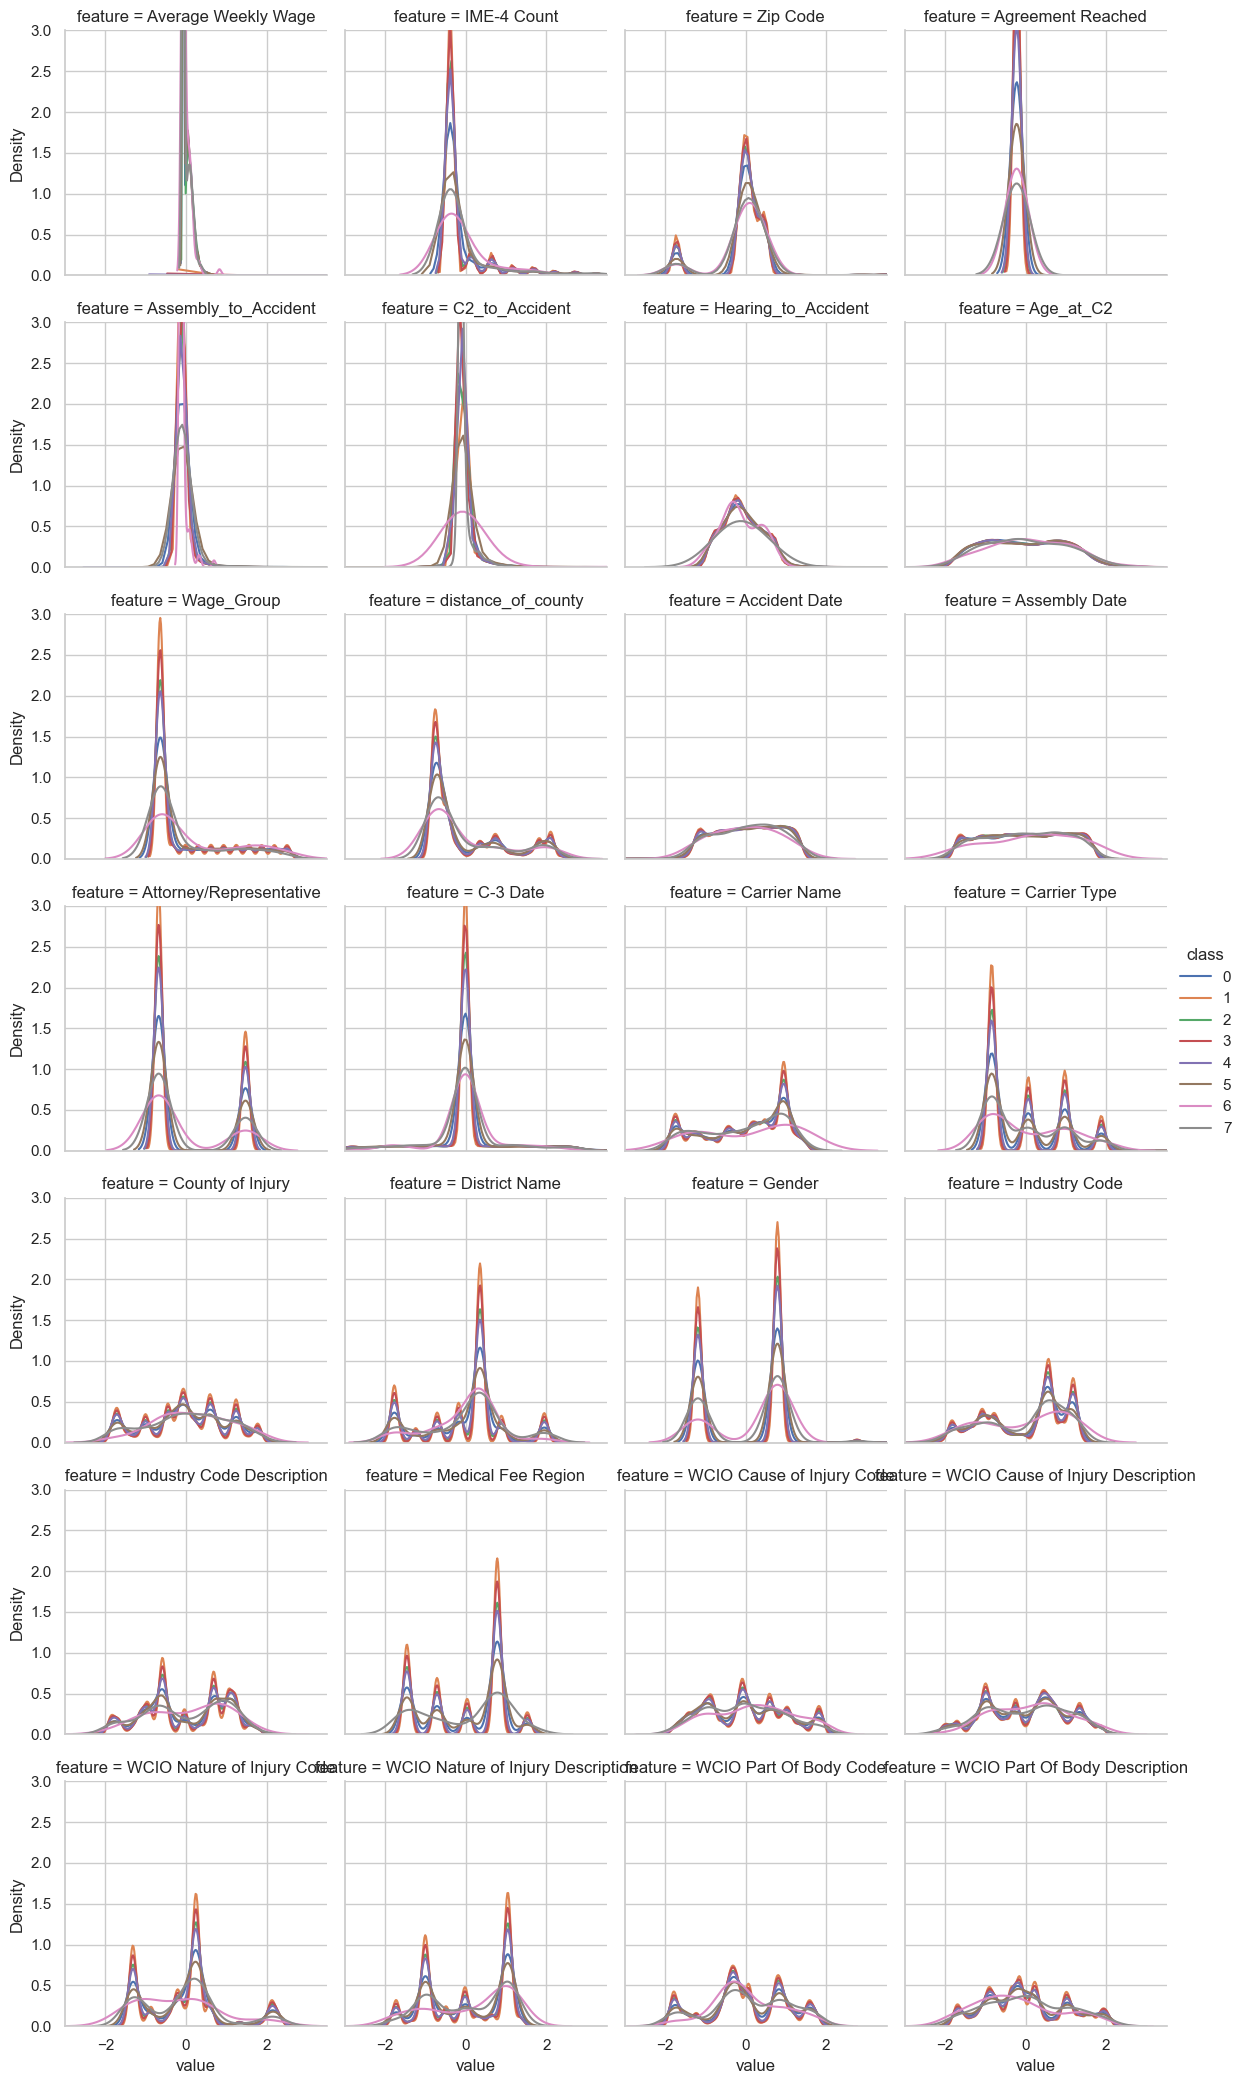

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train and y_train are your training data and labels
# Get the unique class labels in y_train
class_labels = np.unique(y_train)

# Melt the data into a long format
melted_data = pd.melt(X_train_columns_to_keep, value_vars=X_train_columns_to_keep.columns, var_name="feature", value_name="value")

# Repeat y_train for each value in the melted data
repeated_y_train = np.repeat(y_train, len(X_train_columns_to_keep.columns))

# Add the repeated class labels to the melted data
melted_data["class"] = repeated_y_train

# Plot a facet grid with KDEs for each feature and class label
sns.set(style="whitegrid")
g = sns.FacetGrid(melted_data, col="feature", hue="class", col_wrap=4)
g.map(sns.kdeplot, "value")
g.set(xlim=(-3, 3.5))  # Set the x-axis range to -3-3
g.set(ylim=(0, 3))  # Set the y-axis range to 0-0.5
g.add_legend()
plt.show()

<hr>
<a class="anchor" id="balancingdata">
    
## 5.4 Balancing Data
    
</a>

In [91]:
from imblearn.over_sampling import SMOTE

def custom_sampling_strategy(y):
    class_counts = np.bincount(y)
    max_count = np.max(class_counts)
    sampling_strategy = {}
    for i, count in enumerate(class_counts):
        if i in [5, 6, 7]:  # minority classes
            sampling_strategy[i] = 4000
        else:
            sampling_strategy[i] = count  # use the original count for other classes
    return sampling_strategy

smote = SMOTE(random_state=42, sampling_strategy=custom_sampling_strategy)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_columns_to_keep, y_train)

#### Gradient Boost and Random Forest

In [92]:
def train_model(X_train, y_train, model_type='xgb', random_state=42):
    """Train model with multiple options"""
    print(f"\nTraining {model_type} model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=250,
            learning_rate=0.1,
            max_depth=6,
            random_state=random_state,
            n_jobs=2,
            tree_method='hist',
            enable_categorical=True,
            objective='multi:softprob',
            num_class=8,
            eval_metric=['mlogloss', 'merror'],
            use_label_encoder=False
        )
        
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
        
    elif model_type == 'hist_gb':
        model = HistGradientBoostingClassifier(
            max_iter=100,
            learning_rate=0.1,
            max_depth=None,
            random_state=random_state,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    elif model_type == 'simple_rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=2,
            verbose=1,
            class_weight='balanced'
        )
        model.fit(X_train, y_train)
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    return model

model = train_model(X_train_balanced, y_train_balanced)


Training xgb model...
Starting training with 28 features...
[0]	validation_0-mlogloss:1.84144	validation_0-merror:0.21926
[1]	validation_0-mlogloss:1.67097	validation_0-merror:0.22173
[2]	validation_0-mlogloss:1.53750	validation_0-merror:0.21905
[3]	validation_0-mlogloss:1.42924	validation_0-merror:0.21855
[4]	validation_0-mlogloss:1.33795	validation_0-merror:0.21811
[5]	validation_0-mlogloss:1.26048	validation_0-merror:0.21688
[6]	validation_0-mlogloss:1.19343	validation_0-merror:0.21597
[7]	validation_0-mlogloss:1.13453	validation_0-merror:0.21534
[8]	validation_0-mlogloss:1.08275	validation_0-merror:0.21460
[9]	validation_0-mlogloss:1.03732	validation_0-merror:0.21403
[10]	validation_0-mlogloss:0.99632	validation_0-merror:0.21306
[11]	validation_0-mlogloss:0.95976	validation_0-merror:0.21236
[12]	validation_0-mlogloss:0.92708	validation_0-merror:0.21169
[13]	validation_0-mlogloss:0.89788	validation_0-merror:0.21130
[14]	validation_0-mlogloss:0.87138	validation_0-merror:0.21051
[15]

In [93]:
print(model.score(X_train_balanced, y_train_balanced))
print(model.score(X_val_columns_to_keep, y_val))

0.8209953243501952
0.8079362509415234


<hr>
<a class="anchor" id="evaluate">
    
# 6.2 Evaluate the model
    
</a> 

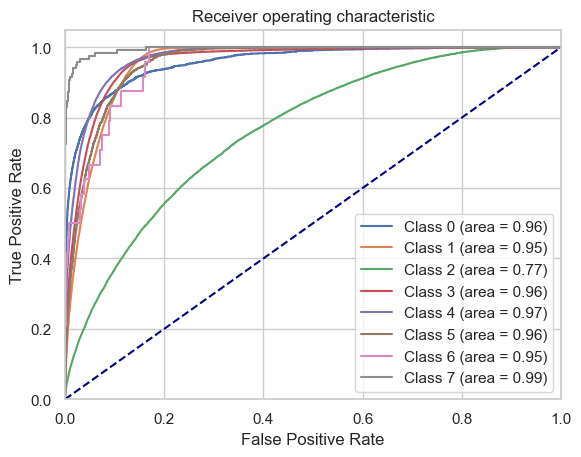

In [94]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities on the validation set
y_pred_proba = model.predict_proba(X_val_columns_to_keep)

encoder = LabelBinarizer()
y_true_onehot = encoder.fit_transform(y_val)

# Plot ROC curve for each class
for i in range(y_true_onehot.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_true_onehot[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [95]:
def evaluate_model(model, X_val, y_val, X_test=None):
    y_val_pred = model.predict(X_val)
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        test_pred = model.predict(X_test)
    
    return val_metrics, test_pred
    
val_metrics, test_pred = evaluate_model(model, X_val_columns_to_keep, y_val, X_test_columns_to_keep)


Validation Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.46      0.57      2676
           1       0.86      0.98      0.92     71988
           2       0.52      0.09      0.15     17161
           3       0.77      0.89      0.83     36976
           4       0.69      0.68      0.68     12063
           5       0.48      0.01      0.02      1052
           6       0.00      0.00      0.00        24
           7       0.61      0.54      0.57       117

    accuracy                           0.81    142057
   macro avg       0.58      0.46      0.47    142057
weighted avg       0.77      0.81      0.77    142057


Metrics:
accuracy: 0.8079
f1_macro: 0.4666


In [96]:
def evaluate_model(model, X_val, y_val, X_test=None, threshold_2=0.5, threshold_5=0.5, threshold_6=0.5):
    y_val_pred_proba = model.predict_proba(X_val)
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)
    
    # Adjust the threshold for classes 2, 5, and 6
    for i, proba in enumerate(y_val_pred_proba):
        if y_val[i] == 2 and proba[2] >= threshold_2:
            y_val_pred[i] = 2
        elif y_val[i] == 5 and proba[5] >= threshold_5:
            y_val_pred[i] = 5
        elif y_val[i] == 6 and proba[6] >= threshold_6:
            y_val_pred[i] = 6
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        y_test_pred_proba = model.predict_proba(X_test)
        y_test_pred = np.argmax(y_test_pred_proba, axis=1)
        
        # Adjust the threshold for classes 2, 5, and 6
        for i, proba in enumerate(y_test_pred_proba):
            if proba[2] >= threshold_2:
                y_test_pred[i] = 2
            elif proba[5] >= threshold_5:
                y_test_pred[i] = 5
            elif proba[6] >= threshold_6:
                y_test_pred[i] = 6
        
        test_pred = y_test_pred
    
    return val_metrics, test_pred

val_metrics, test_pred = evaluate_model(model, X_val_columns_to_keep, y_val, X_test_columns_to_keep, threshold_2=0.1, threshold_5=0.1, threshold_6=0.05)


Validation Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.46      0.57      2676
           1       0.94      0.98      0.96     71988
           2       0.91      0.80      0.85     17161
           3       0.87      0.89      0.88     36976
           4       0.72      0.68      0.70     12063
           5       0.97      0.39      0.56      1052
           6       0.62      0.21      0.31        24
           7       0.64      0.54      0.59       117

    accuracy                           0.90    142057
   macro avg       0.80      0.62      0.68    142057
weighted avg       0.89      0.90      0.89    142057


Metrics:
accuracy: 0.8970
f1_macro: 0.6773


In [100]:
y_val.shape

(142057,)

In [99]:
X_val_columns_to_keep.shape


(142057, 28)

In [101]:
X_val_columns_to_keep, X_holdout_columns_to_keep, y_val, y_holdout = train_test_split(X_val_columns_to_keep, 
                                                                                      y_val, test_size=0.5,
                                                                                      random_state=42,
                                                                                     stratify = y_val)

In [103]:
X_holdout_columns_to_keep.shape

(71029, 28)

In [119]:
def evaluate_model(model, X_val, y_val, X_test=None, X_holdout=None, y_holdout=None, thresholds=None):
    # Adjust the threshold for classes 2, 5, and 6 using the holdout set
    if X_holdout is not None and y_holdout is not None and thresholds is None:
        y_holdout_pred_proba = model.predict_proba(X_holdout)
        best_thresholds = {}
        for class_label in [2, 5, 6]:
            best_threshold = 0.5
            best_f1 = 0
            for threshold in np.arange(0.1, 1, 0.1):
                y_holdout_pred = np.argmax(y_holdout_pred_proba, axis=1)
                y_holdout_pred[y_holdout_pred_proba[:, class_label] >= threshold] = class_label
                f1 = f1_score(y_holdout, y_holdout_pred, average='macro')
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold
            best_thresholds[class_label] = best_threshold
    elif thresholds is not None:
        best_thresholds = thresholds
    
    y_val_pred_proba = model.predict_proba(X_val)
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)
    
    # Adjust the threshold for classes 2, 5, and 6 using the best thresholds found on the holdout set
    if best_thresholds is not None:
        for i, proba in enumerate(y_val_pred_proba):
            for class_label, threshold in best_thresholds.items():
                if proba[class_label] >= threshold:
                    y_val_pred[i] = class_label
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        y_test_pred_proba = model.predict_proba(X_test)
        y_test_pred = np.argmax(y_test_pred_proba, axis=1)
        
        # Adjust the threshold for classes 2, 5, and 6 using the best thresholds found on the holdout set
        if best_thresholds is not None:
            for i, proba in enumerate(y_test_pred_proba):
                for class_label, threshold in best_thresholds.items():
                    if proba[class_label] >= threshold:
                        y_test_pred[i] = class_label
        
        test_pred = y_test_pred
    
    return val_metrics, test_pred

thresholds = {2: 0.25, 5: 0.1, 6: 0.025}

val_metrics, test_pred = evaluate_model(model, X_val_columns_to_keep, y_val, X_test_columns_to_keep, X_holdout_columns_to_keep, y_holdout, thresholds)


Validation Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.47      0.57      1338
           1       0.88      0.94      0.91     35994
           2       0.37      0.30      0.33      8580
           3       0.80      0.77      0.78     18488
           4       0.71      0.66      0.68      6031
           5       0.15      0.37      0.22       526
           6       0.03      0.33      0.05        12
           7       0.57      0.54      0.56        59

    accuracy                           0.78     71028
   macro avg       0.53      0.55      0.51     71028
weighted avg       0.77      0.78      0.77     71028


Metrics:
accuracy: 0.7782
f1_macro: 0.5128


<hr>
<a class="anchor" id="export">
    
# 6.3 Export the predictor
    
</a> 

In [120]:
CLAIM_TYPE_MAPPING = {
    1: '1. CANCELLED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
    }

def create_submission_df(predictions, test_df):
    # Add 1 to predictions to convert back to original scale (0-7 to 1-8)
    numeric_predictions = predictions + 1
    
    # Map numeric predictions to claim type strings
    claim_types = [CLAIM_TYPE_MAPPING[pred] for pred in numeric_predictions]
    
    # Create submission dataframe using original (unscaled) claim identifiers
    submission = pd.DataFrame({
        'Claim Identifier': test_df['Claim Identifier'].astype(int),  # Original claim IDs
        'Claim Injury Type': claim_types  # Full claim type names
    })
    
    return submission

In [121]:
def save_submission(submission_df, experiment_name):
    filename = f'submission_{experiment_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    
    # Display sample of submission
    print("\nSubmission sample:")
    print(submission_df.head())
    print("\nValue counts:")
    print(submission_df['Claim Injury Type'].value_counts())

In [122]:
model_1 = 'Model new'
original_claim_ids = test.index.copy()
submission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))
save_submission(submission_df, model_1)


Submission saved to submission_Model new.csv

Submission sample:
   Claim Identifier Claim Injury Type
0           6165911       2. NON-COMP
1           6166141       2. NON-COMP
2           6165907       2. NON-COMP
3           6166047       2. NON-COMP
4           6166102       2. NON-COMP

Value counts:
Claim Injury Type
2. NON-COMP        283426
3. MED ONLY         63556
4. TEMPORARY        29434
5. PPD SCH LOSS      4686
1. CANCELLED         4585
6. PPD NSL           2094
8. DEATH              133
7. PTD                 61
Name: count, dtype: int64


In [ ]:
aaa

In [ ]:
def transform_data(X_trainval, p):
    """ Performs feature scaling and principal component analysis

    Parameters
    ----------
    X_trainval : pandas.core.frame.DataFrame
        The MRI features of the dataset
    p : str
        inputs the set value of PCA features determined previously; 
        varies depending on the loop iteration
        

    Returns
    -------
    X_trainval_reduced
        The MRI features of the dataset after scaling and PCA
        
    To call it: X_trainval_reduced = transform_data(X_trainval, p)

    """
    
    ss_X = StandardScaler()
    X_trainval_scaled = ss_X.fit_transform(X_trainval)
    
    pca = PCA(n_components=p)
    X_trainval_reduced = pca.fit_transform(X_trainval_scaled)
                    
    return X_trainval_reduced

In [ ]:
metrics = ['accuracy', 'balanced accuracy', 'precision', 'sensitivity', 'specificity']

best_model = pd.DataFrame(columns=['model'] + metrics)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # will be the same across all classifiers

#%%%% Defining necessary functions

############ TO DETERMINE THE BEST PARAMETERS IN EACH CLASSIFIER ###########

# Within the cross-validation loop, this will scale and perform PCA each trainval data s

def validate_best(clf, clf_function, X_train, y_train, X_val, y_val, optimal_p, best_model):
    # create the optimal pipeline
    pipeline = make_pipeline(
        StandardScaler(),
        PCA(n_components=optimal_p),
        clf_function
    )
    
    pipeline.fit(X_train, y_train) # fit the pipeline to the training data
    
    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)

    # determine the true negatives/positives and false negatives/positives
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    # determine performance metrics
    accuracy = accuracy_score(y_val, y_pred) 
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    precision = tp / (tp + fp)
    if precision + recall == 0:
        f1_score = 0
    else:
        f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    ba = (sensitivity + specificity)/ 2

    # determine the probability of a correct answer
    ad_val_prob = pipeline.predict_proba(X_val)
    roc_auc = roc_auc_score(y_val, ad_val_prob[:,1])

    #### COMPUTING RELEVANT PLOTS ###
    
    ## Confusion Matrix ##
    cm = plot_confusion_matrix(pipeline, X_val, y_val, cmap=plt.cm.Blues, values_format='d', display_labels=['AD', 'CN'])
    plt.title(f"Confusion Matrix ({clf})")
    plt.show()
    
    ## ROC curve and AUC score ##
    fpr, tpr, thresholds = roc_curve(y_val, ad_val_prob[:,1])
    display = plot_roc_curve(pipeline, X_val, y_val, linestyle='--', name='ROC Curve')
    plt.title(f"{clf} ROC Curve");
    plt.xlabel('False Positive Rate = 1 - Specificity');
    plt.ylabel('True Positive Rate = Sensitivity');
    plt.show()
    
    ## Precision Recall curve and AUC score ##
    prec, rec, thresholds = precision_recall_curve(y_val, ad_val_prob[:,1])
    auc_pr = average_precision_score(y_val, ad_val_prob[:,1])
    plt.plot(prec, rec, linestyle='--');
    plt.title(f'{clf}; AUC = {round(auc_pr,2)}');
    plt.xlabel('Precision');
    plt.ylabel('Recall');
        
    # update the dataframe with the best hyperparameters for each classifier
    best_model = best_model.append({'model': clf, 'accuracy': accuracy, 'precision': precision, 'f1 score': f1_score, 'specificity': specificity, 'sensitivity': sensitivity, 'balanced accuracy' : ba, 'AUC PR' : auc_pr, 'AUC ROC' : roc_auc}, ignore_index=True)

    return best_model


#%%%%
# ----------------------- #
#      RANDOM FOREST      #
# ----------------------- #
from sklearn.ensemble import RandomForestClassifier

#%%%%% Determining the best RF parameters

n_estimators = [10, 50, 100]
max_depths = [5, 10]

fold_scores_RF = pd.DataFrame(columns=['estimators','depths', 'fold', 'no. components'] + metrics)


# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:    
        for n in n_estimators:
            for d in max_depths:
                # perform scaling and PCA
                X_trainval_reduced = transform_data(X_trainval, p)
                 
                # Perform cross-validation
                X_train, y_train = X_trainval_reduced[train_ind], y_trainval.iloc[train_ind]
                X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
                
                # Train the model
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, n_jobs=3)
                rf.fit(X_train, y_train)
                
                # Make predictions and compute the metrics
                y_pred = rf.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                precision, recall, f1_score, support = classification_report(y_val, y_pred, output_dict=True)['weighted avg'].values()
                
                # Add the results to the DataFrame
                fold_scores_RF = fold_scores_RF.append({'estimators':n,'depths':d, 'fold': i, 'no. components': p, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1 score': f1_score}, ignore_index=True)
        
# Compute the mean metrics across folds for each solver
mean_scores_RF_e = fold_scores_RF.groupby('estimators').mean().reset_index()
mean_scores_RF_d = fold_scores_RF.groupby('depths').mean().reset_index()

mean_scores_RF_pca = fold_scores_RF.groupby('no. components').mean().reset_index()

#%%%%% Testing the best parameters on validation data
# Splitting the data

X_train, y_train, X_val, y_val = split_data(X_trainval, y_trainval)

# Getting RF best params

# Sort mean scores by accuracy and select top row
optimal_RF_e = int(mean_scores_RF_e.sort_values('accuracy', ascending=False).iloc[0]['estimators'])
optimal_RF_d = mean_scores_RF_d.sort_values('accuracy', ascending=False).iloc[0]['depths']
optimal_RF_pca = int(mean_scores_RF_pca.sort_values('accuracy', ascending=False).iloc[0][0])

RF_f = RandomForestClassifier(n_estimators=optimal_RF_e, max_depth=optimal_RF_d, n_jobs=3)

best_model = validate_best('Random Forest', RF_f, X_train, y_train, X_val, y_val, optimal_RF_pca, best_model)

#%%%%

# ----------------------- #
# SUPPORT VECTOR MACHINES #
# ----------------------- #

#%%%%%% Determining the best SVM parameters

from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fold_scores_SVC = pd.DataFrame(columns=['kernel', 'fold', 'no. components'] + metrics)

# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:
          for k in kernels:                     
              
            X_trainval_reduced = transform_data(X_trainval, p)
                        
            # Perform cross-validation
            X_train = X_trainval_reduced[train_ind]
            y_train = y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
        
            # Train the model
            svc = SVC(kernel=k, probability=True) # probability=True added to enable probability estimates
            svc.fit(X_train, y_train)
    
            # Make predictions and compute the metrics
            y_pred = svc.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            precision, recall, f1_score, support = classification_report(y_val, y_pred, output_dict=True)['weighted avg'].values()
            
            # Add the results to the DataFrame
            fold_scores_SVC = fold_scores_SVC.append({'kernel': k, 'no. components': p, 'fold': i, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1 score': f1_score}, ignore_index=True)
    

# Compute the mean metrics across folds for each solver
mean_scores_SVC_k = fold_scores_SVC.groupby('kernel').mean().reset_index()
mean_scores_SVC_p = fold_scores_SVC.groupby('no. components').mean().reset_index()

#%%%%%% Testing on validation data

# Splitting the data

X_train, y_train, X_val, y_val = split_data(X_trainval, y_trainval)

# Getting best params

# Sort mean scores by accuracy and select top row
optimal_SVC_k = mean_scores_SVC_k.sort_values('accuracy', ascending=False).iloc[0]['kernel']
optimal_SVC_pca = int(mean_scores_SVC_p.sort_values('accuracy', ascending=False).iloc[0][0])

# creating optimal pipeline
svc_f = SVC(kernel=optimal_SVC_k, probability=True)

# appending to best_model dataframe
best_model = validate_best('Support Vector Machines', svc_f, X_train, y_train, X_val, y_val, optimal_SVC_pca, best_model)


#%%%% 

# ----------------------- #
#   LOGISTIC REGRESSION   #
# ----------------------- #

#%%%%%% Determining the best LogReg parameters
from sklearn.linear_model import LogisticRegression


solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

fold_scores_LogR = pd.DataFrame(columns=['solver', 'fold', 'no. components'] + metrics)

# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:
        for s in solvers:
            
            X_trainval_reduced = transform_data(X_trainval, p)

            # Perform cross-validation
            X_train, y_train = X_trainval_reduced[train_ind], y_trainval.iloc[train_ind]
            X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
        
            # Train the model
            logr = LogisticRegression(solver = s)
            logr.fit(X_train, y_train)
            
            # Make predictions and compute the metrics
            y_pred = logr.predict(X_val)
            
            
            # determine the true negatives/positives and false negatives/positives
            tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
            # determine performance metrics
            accuracy = accuracy_score(y_val, y_pred) 
            specificity = tn / (tn + fp)
            sensitivity = tp / (tp + fn)
            precision = tp / (tp + fp)
            if precision + recall == 0:
                f1_score = 0
            else:
                f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
            ba = (sensitivity + specificity)/ 2
     
            # Add the results to the DataFrame
            fold_scores_LogR = fold_scores_LogR.append({'solver': s, 'fold': i, 'no. components': p, 'accuracy': accuracy, 'precision': precision, 'f1 score': f1_score, 'specificity': specificity, 'sensitivity': sensitivity, 'balanced accuracy' : ba}, ignore_index=True)

            
# Compute the mean metrics across folds for each solver
mean_scores_LogR_s = fold_scores_LogR.groupby('solver').mean().reset_index()

mean_scores_LogR_pca = fold_scores_LogR.groupby('no. components').mean().reset_index()


# Getting best params: Sorting mean scores by accuracy and selecting top row
optimal_LogR_s = mean_scores_LogR_s.sort_values('accuracy', ascending=False).iloc[0]['solver']
optimal_LogR_pca = int(mean_scores_LogR_pca.sort_values('accuracy', ascending=False).iloc[0][0])

# creating the optimal classifier pipeline
logr_f = LogisticRegression(solver = optimal_LogR_s)

# testing the data
best_model = validate_best('Logistic Regression', logr_f, X_train, y_train, X_val, y_val, optimal_LogR_pca, best_model)

#%%%%

# ---------------------- #
#    GRADIENT BOOSTING   #
# ---------------------- #

#%%%%% Determining the best GB parameters
from sklearn.ensemble import GradientBoostingClassifier


n_estimators = [75, 200, 300]
learning_rate = [.1, .5, .9]

fold_scores_GB = pd.DataFrame(columns=['no. estimators','max_depths','learning_rate', 'fold', 'no. components'] + metrics)

# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:
         for n in n_estimators:
             for lr in learning_rate:
          
                # Scaling and PCA
                X_trainval_reduced = transform_data(X_trainval, p)

                # Perform cross-validation
                X_train, y_train = X_trainval_reduced[train_ind], y_trainval.iloc[train_ind]
                X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
                
                # Train the model
                gb = GradientBoostingClassifier(n_estimators=n, max_depth=5, learning_rate=lr)
                gb.fit(X_train, y_train)

                # Make predictions and compute the metrics
                y_pred = gb.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                precision, recall, f1_score, support = classification_report(y_val, y_pred, output_dict=True)['weighted avg'].values()
                
                # Add the results to the DataFrame
                fold_scores_GB = fold_scores_GB.append({'no. estimators':n , 'max_depths': d, 'learning_rate': lr, 'no. components': p, 'fold': i, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1 score': f1_score}, ignore_index=True)

mean_scores_GB_e = fold_scores_GB.groupby('no. estimators').mean().reset_index()
mean_scores_GB_lr = fold_scores_GB.groupby('learning_rate').mean().reset_index()
mean_scores_GB_pca = fold_scores_GB.groupby('no. components').mean().reset_index()

#%%%%% Testing on validation data: Splitting the data and getting best params



# Getting best params: Sorting mean scores by accuracy and selecting top row
optimal_GB_e = int(mean_scores_GB_e.sort_values('accuracy', ascending=False).iloc[0]['no. estimators'])
optimal_GB_lr = mean_scores_GB_lr.sort_values('accuracy', ascending=False).iloc[0]['learning_rate']
optimal_GB_pca = int(mean_scores_LogR_pca.sort_values('accuracy', ascending=False).iloc[0][0])

# creating the classifier function with the optimal params
gb_f = GradientBoostingClassifier(n_estimators=optimal_GB_e, max_depth=5, learning_rate=optimal_GB_lr)


# testing the data
best_model = validate_best('Gradient Boosting', gb_f, X_train, y_train, X_val, y_val, optimal_GB_pca, best_model)

#%%%%

# ---------------------- #
#       NAIVE BAYES      #
# ---------------------- #

#%%%%% Determining the best NB parameters
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Comparison of Naive Bayes Models
estimators = {'GaussianNB': GaussianNB(),'BernoulliNB': BernoulliNB()}

fold_scores_NB = pd.DataFrame(columns=['no. estimators','fold', 'no. components'] + metrics)


# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:
         for e in estimators:
             # Scaling and PCA
             X_trainval_reduced = transform_data(X_trainval, p)

             # Perform cross-validation
             X_train, y_train = X_trainval_reduced[train_ind], y_trainval.iloc[train_ind]
             X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
                 
             # Train the model
             estimators[e].fit(X_train, y_train)
             
             # Make predictions and compute the metrics
             y_pred = estimators[e].predict(X_val)
             accuracy = accuracy_score(y_val, y_pred)
             precision, recall, f1_score, support = classification_report(y_val, y_pred, output_dict=True)['weighted avg'].values()
             
             # Add the results to the DataFrame
             fold_scores_NB = fold_scores_NB.append({'estimator':e , 'no. components': p, 'fold': i, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1 score': f1_score}, ignore_index=True)
     
# Compute the mean metrics across folds for each solver
mean_scores_NB_e = fold_scores_NB.groupby('estimator').mean().reset_index()
mean_scores_NB_pca = fold_scores_NB.groupby('no. components').mean().reset_index()

#%%%%% Testing on validation data: Splitting the data and getting best params

# Splitting the data
X_train, y_train, X_val, y_val = split_data(X_trainval, y_trainval)

# Getting best params: Sorting mean scores by accuracy and selecting top row
optimal_NB_e = mean_scores_NB_e.sort_values('accuracy', ascending=False).iloc[0]['estimator']
optimal_NB_pca = int(mean_scores_NB_pca.sort_values('accuracy', ascending=False).iloc[0][0])

# creating the classifier function with the optimal params
nb_f = estimators[optimal_NB_e]

# testing the data
best_model = validate_best('Naive Bayes', nb_f, X_train, y_train, X_val, y_val, optimal_NB_pca, best_model)


#%%%%

# ---------------------- #
#  K-NEAREST NEIGHBOURS  #
# ---------------------- #

#%%%%% Determining the best KNN parameters

from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 5, 9, 13, 17]
dist = ['manhattan', 'euclidean', 'chebyshev']

fold_scores_KNN = pd.DataFrame(columns=['dist','nvalues','fold', 'no. components'] + metrics)

# Perform cross-validation
for i, (train_ind, val_ind) in enumerate(skf.split(X_trainval, y_trainval)):
    for p in pca_values:
         for n in nvalues:
             for d in dist:
                 # Scaling and PCA
                 X_trainval_reduced = transform_data(X_trainval, p)
    
                 # Perform cross-validation
                 X_train, y_train = X_trainval_reduced[train_ind], y_trainval.iloc[train_ind]
                 X_val, y_val = X_trainval_reduced[val_ind], y_trainval.iloc[val_ind]
                 
                 # Train the model
                 knn = KNeighborsClassifier(n_neighbors=n, metric=d, n_jobs=3)
                 knn.fit(X_train, y_train)
                 
                 # Make predictions and compute the metrics
                 y_pred = knn.predict(X_val)
                 accuracy = accuracy_score(y_val, y_pred)
                 precision, recall, f1_score, support = classification_report(y_val, y_pred, output_dict=True)['weighted avg'].values()            
                
                 # Add the results to the DataFrame
                 fold_scores_KNN = fold_scores_KNN.append({'dist':d ,'nvalues': n, 'no. components': p, 'fold': i, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1 score': f1_score}, ignore_index=True)
         
# Compute the mean metrics across folds for each solver
mean_scores_knn_n = fold_scores_KNN.groupby('nvalues').mean().reset_index()
mean_scores_knn_d = fold_scores_KNN.groupby('dist').mean().reset_index()
mean_scores_knn_pca = fold_scores_KNN.groupby('no. components').mean().reset_index()

#%%%%% Testing on validation data: Splitting the data and getting best params

# Splitting the data
X_train, y_train, X_val, y_val = split_data(X_trainval, y_trainval)

# Getting best params: Sorting mean scores by accuracy and selecting top row
optimal_knn_n = int(mean_scores_knn_n.sort_values('accuracy', ascending=False).iloc[0]['nvalues'])
optimal_knn_d = mean_scores_knn_d.sort_values('accuracy', ascending=False).iloc[0]['dist']

optimal_knn_pca = int(mean_scores_knn_pca.sort_values('accuracy', ascending=False).iloc[0][0])

# creating the classifier function with the optimal params
knn_f = KNeighborsClassifier(n_neighbors = optimal_knn_n, metric = optimal_knn_d, n_jobs=3)

# testing the data
best_model = validate_best('K Nearest Neighbours', knn_f, X_train, y_train, X_val, y_val, optimal_knn_pca, best_model)

#%%%%%

# Saving the folds to avoid having to run everything again
best_model.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/best_model.csv', index=True)

fold_scores_GB.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_GB.csv', index=True)
fold_scores_KNN.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_KNN.csv', index=True)
fold_scores_LogR.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_LogR.csv', index=True)
fold_scores_NB.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_NB.csv', index=True)
fold_scores_RF.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_RF.csv', index=True)
fold_scores_SVC.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/folds/fold_scores_SVC.csv', index=True)

#%%%% 

# ----------------------- #
#  DESCRIPTIVE STATISTICS #
# ----------------------- #

#%%%%%% Descriptive statistics across the 6 classifiers

metrics_bm = ['accuracy', 'balanced accuracy', 'precision', 'sensitivity',
       'specificity', 'AUC PR', 'AUC ROC', 'f1 score']

stats_df = pd.DataFrame(columns=['metric', 'min', 'max', 'mean', 'variance'])

for m in range(len(metrics_bm)):
    describe = stats.describe(best_model[metrics_bm[m]])
    stats_df = stats_df.append({'metric': metrics_bm[m],
                        'min': describe.minmax[0],
                        'max': describe.minmax[1],
                        'mean': describe.mean,
                        'variance': describe.variance}, ignore_index=True)

stats_df.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/stats_df.csv', index=True)

#%% STEP 4: Running the best model on test data
#%%%% 

# ----------------------- #
#        BEST MODEL       #
# ----------------------- #

#%%%%% Determining best model

best_model_of_all_time = best_model.sort_values('accuracy', ascending=False).iloc[0]['model']
print(f"The best model of all time is {best_model_of_all_time}! \nI will now run this model on the test data.")

# Getting best params: Sorting mean scores by accuracy and selecting top row
# creating the classifier function with the optimal params
logr_f = LogisticRegression(solver = optimal_LogR_s)

print(f"The best solver for this model is '{optimal_LogR_s}'.")
print(f"The best number of components for this model is {optimal_LogR_pca}.")

# Inferential statistic across optimal classifier folds

metrics_bm = ['accuracy', 'balanced accuracy', 'precision', 'sensitivity',
       'specificity', 'f1 score']

stats_df_LogR = pd.DataFrame(columns=['metric', 'min', 'max', 'mean', 'variance'])

for m in range(len(metrics_bm)):
    describe = stats.describe(fold_scores_LogR[metrics_bm[m]])
    stats_df_LogR = stats_df_LogR.append({'metric': metrics_bm[m],
                        'min': describe.minmax[0],
                        'max': describe.minmax[1],
                        'mean': describe.mean,
                        'variance': describe.variance}, ignore_index=True)


stats_df_LogR.to_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/stats_LR.csv', index=True)

#%%%% 

# ----------------------- #
#   RUNNING ON TEST DATA  #
# ----------------------- #

#%%%%%%
# running the model on the unseen test data 

X_test = pd.read_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/X_test.csv', index_col=0)
y_test = pd.read_csv('/Users/sara/Desktop/Y3 Machine Learning in Neuroscience/Assessment/y_test.csv', index_col=0)

bestest_model = pd.DataFrame(columns=['model'] + metrics)

bestest_model = validate_best('Logistic Regression', logr_f, X_trainval, y_trainval, X_test, y_test, optimal_LogR_pca, bestest_model)